# Projet 7 : Implémentez un modèle de scoring

## NB B : Exploration

### Sommaire

**Partie 1 : Importation du jeu de données**
 - <a href="#C1"> 1. Importation des données</a>

**Partie 2 : Nettoyage**
 - <a href="#C2"> 2. Nettoyage du jeu de données</a>
     - <a href="#C21"> 2.1 Variables qualitatives </a>
     - <a href="#C22"> 2.2 Traitement des doublons et valeurs manquantes </a>

**Partie 3 : Exploration**
 - <a href="#C3">3. Exploration des données </a>
     - <a href="#C31">3.1 Analyses univariées </a>
     - <a href="#C32">3.2 Analyses bivariées </a>
     - <a href="#C33">3.3 Analyses multivariées </a>



In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno
import clean #mon module de fontions qui me permettent de nettoyer un dataframe
import plot_

# Filter warnings
import warnings
warnings.filterwarnings('ignore')


# <a name="C1"> 1. Importation des données</a>

In [ ]:
df = pd.read_csv('/content/df_set_1.csv',
                 #usecols= sel_features_application,
                 dtype={'SK_ID_CURR' : 'object',
                        'CODE_GENDER': 'category',
                        'TARGET' :  'category'
                      })

In [ ]:
df.head()

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,OCCUPATION,NIVEAU_ETUDE,AGE,ANCIENNETE_EMPLOI,SCORE_REGION,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%)
0,100002,1,M,Y,0,202500.0,406597.5,24700.5,Working,BAC,26,2,2,10,Business Entity,0.262949,12.2
1,100003,0,F,N,0,270000.0,1293502.5,35698.5,State servant,ENS_SUP,47,3,1,11,Education,0.622246,13.2
2,100004,0,M,Y,0,67500.0,135000.0,6750.0,Working,BAC,53,1,2,9,Government and Public Services,0.555912,10.0
3,100006,0,F,Y,0,135000.0,312682.5,29686.5,Working,BAC,53,8,2,17,Business Entity,0.650442,22.0
4,100007,0,M,Y,0,121500.0,513000.0,21865.5,Working,BAC,55,8,2,11,Other Categories,0.322738,18.0


In [ ]:
credit_card = pd.read_csv('/content/credit_card.csv',
                 #usecols= sel_features_application,
                 dtype={'SK_ID_CURR' : 'object',
                      })

In [ ]:
credit_card.head()

,SK_ID_CURR,CC_ANCIENNETE_MOIS,CC_RECENCE_MOIS,CC_SOLDE_MOYEN_MENSUEL,CC_LIMITE_CREDIT_MOYENNE,CC_MONTANT_RETRAIT_MOYEN,CC_MIN_REMBOURSEMENT_MOYEN,CC_PAIEMENT_TOTAL_MOYEN,CC_NOMBRE_RETRAIT_MOYEN,CC_J_RETARD_MOYEN,CC_NBRE_CONTRAT_TOTAL,CC_NBRE_CONTRAT_INACTIF
0,100006,6,1,0.000000,270000.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0
1,100011,75,2,54482.111149,164189.189189,2432.432432,3902.759392,4520.067568,0.054054,0.0,1,0
2,100021,18,2,0.000000,675000.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,1
3,100023,11,4,0.000000,135000.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0
4,100036,13,2,0.000000,78750.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0


In [ ]:
POS = pd.read_csv('/content/POS.csv',
                 #usecols= sel_features_application,
                 dtype={'SK_ID_CURR' : 'object',
                      })

In [ ]:
POS.head()

,SK_ID_CURR,POS_ANCIENNETE_MOIS,POS_RECENCE_MOIS,POS_J_RETARD_MOYEN,POS_NBRE_CONTRAT_TOTAL,POS_NBRE_CONTRAT_INACTIF,POS_PROGRESS_MAX_MIN
0,100002,19,1,0.0,1,0,75.000000
1,100003,77,18,0.0,3,2,91.666667
2,100004,27,24,0.0,1,1,100.000000
3,100006,19,1,0.0,3,2,75.000000
4,100007,77,1,0.0,5,3,45.833333


In [ ]:
install = pd.read_csv('/content/install.csv',
                 #usecols= sel_features_application,
                 dtype={'SK_ID_CURR' : 'object',
                      })


In [ ]:
install.head()

,SK_ID_CURR,INST_J_RETARD_MAX,INST_RESTE_A_PAYER
0,100002,0.0,0.000000e+00
1,100003,0.0,0.000000e+00
2,100004,0.0,0.000000e+00
3,100006,0.0,0.000000e+00
4,100007,1.0,9.094947e-13


In [ ]:
bureau = pd.read_csv('/content/Bureau.csv',
                 #usecols= sel_features_application,
                 dtype={'SK_ID_CURR' : 'object',
                      })

# Merge

In [ ]:
## MERGE à df
df = df.merge(credit_card, how = 'left', on = 'SK_ID_CURR')
df = df.merge(POS, how = 'left', on = 'SK_ID_CURR')
df = df.merge(install, how = 'left', on = 'SK_ID_CURR')
df = df.merge(bureau, how = 'left', on = 'SK_ID_CURR')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   GENRE                       307511 non-null  object  
 3   PROPRIETAIRE                307511 non-null  object  
 4   NBRE_ENFANT                 307511 non-null  int64   
 5   REVENUS_TOT                 307511 non-null  float64 
 6   MONTANT_CREDIT              307511 non-null  float64 
 7   REMB_ANNUEL                 307499 non-null  float64 
 8   OCCUPATION                  307511 non-null  object  
 9   NIVEAU_ETUDE                307511 non-null  object  
 10  AGE                         307511 non-null  int64   
 11  ANCIENNETE_EMPLOI           307511 non-null  int64   
 12  SCORE_REGION                307511 non-null  int64   
 13 

In [ ]:
## RATIO CARTE DE CREDIT
df['CC_RATIO_CREDIT'] = round((df['CC_SOLDE_MOYEN_MENSUEL']/df['CC_LIMITE_CREDIT_MOYENNE'])*100,2)
df['CC_RATIO_CREDIT'] = df['CC_RATIO_CREDIT'].fillna(0)

## Pour les clients n'ayant pas de carte de crédit, les features suivantes sont nulles
col_cc = ['CC_ANCIENNETE_MOIS', 'CC_RECENCE_MOIS',
       'CC_SOLDE_MOYEN_MENSUEL', 'CC_LIMITE_CREDIT_MOYENNE',
       'CC_MONTANT_RETRAIT_MOYEN', 'CC_MIN_REMBOURSEMENT_MOYEN',
       'CC_PAIEMENT_TOTAL_MOYEN', 'CC_NOMBRE_RETRAIT_MOYEN',
       'CC_J_RETARD_MOYEN', 'CC_NBRE_CONTRAT_TOTAL',
       'CC_NBRE_CONTRAT_INACTIF']
df[col_cc] = df[col_cc].fillna(0)
#idem POS
col_pos = ['POS_ANCIENNETE_MOIS', 'POS_RECENCE_MOIS',
       'POS_J_RETARD_MOYEN', 'POS_NBRE_CONTRAT_TOTAL',
       'POS_NBRE_CONTRAT_INACTIF']
df[col_pos] = df[col_pos].fillna(0)
df['POS_PROGRESS_MAX_MIN'] = df['POS_PROGRESS_MAX_MIN'].fillna(100)

#idem credit_bureau
col_bur = ['CB_RECENCE_APPL', 'CB_J_RETARD', 'CB_SOMME_DUES_RETARD',
       'CB_ANCIENNETE_MOIS', 'CB_NBRE_CONTRAT_ACTIF', 'CB_NBRE_CONTRAT_TOTAL',
       'CB_REMB_ANNUEL_TOTAL', 'CB_RECENCE_ACTIVITE', 'CB_RESTE_A_PAYER']
df[col_bur] = df[col_bur].fillna(0)

#idem install
col_inst= ['INST_J_RETARD_MAX', 'INST_RESTE_A_PAYER']
df[col_inst] = df[col_inst].fillna(0)

In [ ]:
df.isna().sum()

SK_ID_CURR                      0
TARGET                          0
GENRE                           0
PROPRIETAIRE                    0
NBRE_ENFANT                     0
REVENUS_TOT                     0
MONTANT_CREDIT                  0
REMB_ANNUEL                    12
OCCUPATION                      0
NIVEAU_ETUDE                    0
AGE                             0
ANCIENNETE_EMPLOI               0
SCORE_REGION                    0
HEURE_APP                       0
SECTEUR_ACTIVITE                0
SCORE_2_EXT                   660
RATIO_ENDETT(%)                12
CC_ANCIENNETE_MOIS              0
CC_RECENCE_MOIS                 0
CC_SOLDE_MOYEN_MENSUEL          0
CC_LIMITE_CREDIT_MOYENNE        0
CC_MONTANT_RETRAIT_MOYEN        0
CC_MIN_REMBOURSEMENT_MOYEN      0
CC_PAIEMENT_TOTAL_MOYEN         0
CC_NOMBRE_RETRAIT_MOYEN         0
CC_J_RETARD_MOYEN               0
CC_NBRE_CONTRAT_TOTAL           0
CC_NBRE_CONTRAT_INACTIF         0
POS_ANCIENNETE_MOIS             0
POS_RECENCE_MO

In [ ]:
df['NBRE_CONTRAT_ACTIFS'] = (df['CC_NBRE_CONTRAT_TOTAL']-df['CC_NBRE_CONTRAT_INACTIF']) + (df['POS_NBRE_CONTRAT_TOTAL']-df['POS_NBRE_CONTRAT_INACTIF']) + (df['CB_NBRE_CONTRAT_ACTIF'])

In [ ]:
df['NBRE_J_RETARD'] = df['CB_J_RETARD'] + df['INST_J_RETARD_MAX'] + df['CC_J_RETARD_MOYEN'] + df['POS_J_RETARD_MOYEN']

In [ ]:
df['CHARGES_ANNUEL'] = (df['CC_MIN_REMBOURSEMENT_MOYEN']*12 + df['CB_REMB_ANNUEL_TOTAL'] + df['INST_RESTE_A_PAYER'] + df['REMB_ANNUEL'])
df['RATIO_ENDETT_1(%)'] = (df['CHARGES_ANNUEL']/ (df['REVENUS_TOT']))*100
df['ANCIENNETE_CREDIT'] = np.max(np.abs(df[['CC_ANCIENNETE_MOIS', 'POS_ANCIENNETE_MOIS', 'CB_ANCIENNETE_MOIS']]), axis=1)

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT',
       'REVENUS_TOT', 'MONTANT_CREDIT', 'REMB_ANNUEL', 'OCCUPATION',
       'NIVEAU_ETUDE', 'AGE', 'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP',
       'SECTEUR_ACTIVITE', 'SCORE_2_EXT', 'RATIO_ENDETT(%)',
       'CC_ANCIENNETE_MOIS', 'CC_RECENCE_MOIS', 'CC_SOLDE_MOYEN_MENSUEL',
       'CC_LIMITE_CREDIT_MOYENNE', 'CC_MONTANT_RETRAIT_MOYEN',
       'CC_MIN_REMBOURSEMENT_MOYEN', 'CC_PAIEMENT_TOTAL_MOYEN',
       'CC_NOMBRE_RETRAIT_MOYEN', 'CC_J_RETARD_MOYEN', 'CC_NBRE_CONTRAT_TOTAL',
       'CC_NBRE_CONTRAT_INACTIF', 'POS_ANCIENNETE_MOIS', 'POS_RECENCE_MOIS',
       'POS_J_RETARD_MOYEN', 'POS_NBRE_CONTRAT_TOTAL',
       'POS_NBRE_CONTRAT_INACTIF', 'POS_PROGRESS_MAX_MIN', 'INST_J_RETARD_MAX',
       'INST_RESTE_A_PAYER', 'CB_RECENCE_APPL', 'CB_J_RETARD',
       'CB_SOMME_DUES_RETARD', 'CB_ANCIENNETE_MOIS', 'CB_NBRE_CONTRAT_ACTIF',
       'CB_NBRE_CONTRAT_TOTAL', 'CB_REMB_ANNUEL_TOTAL', 'CB_RECENCE_ACTIVITE',
      

In [ ]:
df.to_csv('/content/P7_NB/df_total.csv')

In [ ]:
df = df[['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT', 'ANCIENNETE_CREDIT', 'CHARGES_ANNUEL',
       'REVENUS_TOT', 'MONTANT_CREDIT', 'REMB_ANNUEL', 'OCCUPATION', 'CC_RATIO_CREDIT',
       'NIVEAU_ETUDE', 'AGE', 'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP',
       'SECTEUR_ACTIVITE', 'SCORE_2_EXT', 'RATIO_ENDETT(%)', 'NBRE_CONTRAT_ACTIFS',
       'NBRE_J_RETARD', 'RATIO_ENDETT_1(%)', 'POS_PROGRESS_MAX_MIN', 'CC_NOMBRE_RETRAIT_MOYEN', 'CB_SOMME_DUES_RETARD']]

In [ ]:
df.head()

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
0,100002,1,M,Y,0,47.0,24700.5,202500.0,406597.5,24700.5,...,10,Business Entity,0.262949,12.2,3.0,0.0,12.197778,75.000000,0.0,0.0
1,100003,0,F,N,0,77.0,35698.5,270000.0,1293502.5,35698.5,...,11,Education,0.622246,13.2,1.0,0.0,13.221667,91.666667,0.0,0.0
2,100004,0,M,Y,0,27.0,6750.0,67500.0,135000.0,6750.0,...,9,Government and Public Services,0.555912,10.0,0.0,0.0,10.000000,100.000000,0.0,0.0
3,100006,0,F,Y,0,19.0,29686.5,135000.0,312682.5,29686.5,...,17,Business Entity,0.650442,22.0,2.0,0.0,21.990000,75.000000,0.0,0.0
4,100007,0,M,Y,0,77.0,21865.5,121500.0,513000.0,21865.5,...,11,Other Categories,0.322738,18.0,2.0,1.0,17.996296,45.833333,0.0,0.0


# <a name="C2"> 2. Nettoyage du jeu de données</a>



- ## Fonction **supp_outliers**

In [ ]:
def supp_outliers(df, FEAT, lim_fact, val):
  iqr = stats.iqr(df[FEAT])
  lim = iqr*lim_fact
  df.loc[df[FEAT] >= iqr+ lim, FEAT] = val
  return df

## <a name="C21"> 2.1 Valeurs abbérantes </a>

In [ ]:
df.describe()

,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,CC_RATIO_CREDIT,AGE,ANCIENNETE_EMPLOI,SCORE_REGION,HEURE_APP,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
count,307511.000000,307511.000000,3.074990e+05,3.075110e+05,3.075110e+05,307499.000000,307511.00,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,307499.00000,307511.000000,307511.000000,307499.000000,307511.000000,307511.000000,3.075110e+05
mean,0.417052,55.653346,1.274267e+04,1.687979e+05,5.990260e+05,27108.573909,inf,44.547115,-177.342820,2.052463,12.063419,5.143927e-01,18.09295,1.485257,5.634491,10.100219,78.204132,0.435682,1.911071e+02
std,0.722121,31.237440,2.191036e+05,2.371231e+05,4.024908e+05,14493.737315,NaN,12.125447,392.600218,0.509034,3.265832,1.910602e-01,9.45736,1.648208,85.117348,131.789746,30.968095,2.082412,1.527103e+04
min,0.000000,0.000000,-4.869597e+06,2.565000e+04,4.500000e+04,1615.500000,-8.48,21.000000,-1015.000000,1.000000,0.000000,8.173617e-08,0.00000,0.000000,0.000000,-3739.756104,0.000000,0.000000,0.000000e+00
25%,0.000000,27.000000,1.541700e+04,1.125000e+05,2.700000e+05,16524.000000,0.00,34.000000,1.000000,2.000000,10.000000,3.924574e-01,11.50000,0.000000,0.000000,11.285714,58.333333,0.000000,0.000000e+00
50%,0.000000,58.000000,2.767950e+04,1.471500e+05,5.135310e+05,24903.000000,0.00,44.000000,3.000000,2.000000,12.000000,5.659614e-01,16.30000,1.000000,0.000000,18.960000,100.000000,0.000000,0.000000e+00
75%,1.000000,86.000000,4.738816e+04,2.025000e+05,8.086500e+05,34596.000000,0.00,55.000000,8.000000,2.000000,14.000000,6.636171e-01,22.90000,2.000000,0.560000,31.327778,100.000000,0.000000,0.000000e+00
max,19.000000,96.000000,5.686097e+07,1.170000e+08,4.050000e+06,258025.500000,inf,70.000000,50.000000,3.000000,23.000000,8.549997e-01,187.60000,20.000000,4092.000000,36102.202857,100.000000,118.250000,3.756681e+06


In [ ]:
df.loc[df['RATIO_ENDETT_1(%)'].idxmax()]

SK_ID_CURR                       220644
TARGET                                1
GENRE                                 F
PROPRIETAIRE                          Y
NBRE_ENFANT                           0
ANCIENNETE_CREDIT                  37.0
CHARGES_ANNUEL               56860969.5
REVENUS_TOT                    157500.0
MONTANT_CREDIT                 276277.5
REMB_ANNUEL                     15988.5
OCCUPATION                    Pensioner
CC_RATIO_CREDIT                     0.0
NIVEAU_ETUDE                    ENS_SUP
AGE                                  57
ANCIENNETE_EMPLOI                 -1015
SCORE_REGION                          2
HEURE_APP                             7
SECTEUR_ACTIVITE               Inactive
SCORE_2_EXT                    0.261164
RATIO_ENDETT(%)                    10.2
NBRE_CONTRAT_ACTIFS                 2.0
NBRE_J_RETARD                       0.0
RATIO_ENDETT_1(%)          36102.202857
POS_PROGRESS_MAX_MIN              100.0
CC_NOMBRE_RETRAIT_MOYEN             0.0


In [ ]:
supp_outliers(df, 'NBRE_ENFANT', 4, 0)
supp_outliers(df, 'REVENUS_TOT',10, np.nan)

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
0,100002,1,M,Y,0,47.0,24700.500,202500.0,406597.5,24700.5,...,10,Business Entity,0.262949,12.2,3.0,0.000000,12.197778,75.000000,0.0,0.0
1,100003,0,F,N,0,77.0,35698.500,270000.0,1293502.5,35698.5,...,11,Education,0.622246,13.2,1.0,0.000000,13.221667,91.666667,0.0,0.0
2,100004,0,M,Y,0,27.0,6750.000,67500.0,135000.0,6750.0,...,9,Government and Public Services,0.555912,10.0,0.0,0.000000,10.000000,100.000000,0.0,0.0
3,100006,0,F,Y,0,19.0,29686.500,135000.0,312682.5,29686.5,...,17,Business Entity,0.650442,22.0,2.0,0.000000,21.990000,75.000000,0.0,0.0
4,100007,0,M,Y,0,77.0,21865.500,121500.0,513000.0,21865.5,...,11,Other Categories,0.322738,18.0,2.0,1.000000,17.996296,45.833333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,M,N,0,8.0,27558.000,157500.0,254700.0,27558.0,...,15,Other Categories,0.681632,17.5,0.0,0.000000,17.497143,100.000000,0.0,0.0
307507,456252,0,F,Y,0,82.0,12001.500,72000.0,269550.0,12001.5,...,8,Inactive,0.115992,16.7,0.0,0.000000,16.668750,100.000000,0.0,0.0
307508,456253,0,F,Y,0,96.0,88348.500,153000.0,677664.0,29979.0,...,9,Education,0.535722,19.6,3.0,0.294118,57.744118,100.000000,0.0,0.0
307509,456254,1,F,Y,0,36.0,20205.000,171000.0,370107.0,20205.0,...,9,Business Entity,0.514163,11.8,2.0,0.000000,11.815789,50.000000,0.0,0.0


In [ ]:
supp_outliers(df, 'CHARGES_ANNUEL',10, np.nan)

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
0,100002,1,M,Y,0,47.0,24700.500,202500.0,406597.5,24700.5,...,10,Business Entity,0.262949,12.2,3.0,0.000000,12.197778,75.000000,0.0,0.0
1,100003,0,F,N,0,77.0,35698.500,270000.0,1293502.5,35698.5,...,11,Education,0.622246,13.2,1.0,0.000000,13.221667,91.666667,0.0,0.0
2,100004,0,M,Y,0,27.0,6750.000,67500.0,135000.0,6750.0,...,9,Government and Public Services,0.555912,10.0,0.0,0.000000,10.000000,100.000000,0.0,0.0
3,100006,0,F,Y,0,19.0,29686.500,135000.0,312682.5,29686.5,...,17,Business Entity,0.650442,22.0,2.0,0.000000,21.990000,75.000000,0.0,0.0
4,100007,0,M,Y,0,77.0,21865.500,121500.0,513000.0,21865.5,...,11,Other Categories,0.322738,18.0,2.0,1.000000,17.996296,45.833333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,M,N,0,8.0,27558.000,157500.0,254700.0,27558.0,...,15,Other Categories,0.681632,17.5,0.0,0.000000,17.497143,100.000000,0.0,0.0
307507,456252,0,F,Y,0,82.0,12001.500,72000.0,269550.0,12001.5,...,8,Inactive,0.115992,16.7,0.0,0.000000,16.668750,100.000000,0.0,0.0
307508,456253,0,F,Y,0,96.0,88348.500,153000.0,677664.0,29979.0,...,9,Education,0.535722,19.6,3.0,0.294118,57.744118,100.000000,0.0,0.0
307509,456254,1,F,Y,0,36.0,20205.000,171000.0,370107.0,20205.0,...,9,Business Entity,0.514163,11.8,2.0,0.000000,11.815789,50.000000,0.0,0.0


In [ ]:
df.loc[df['CC_RATIO_CREDIT'] == np.inf, 'CC_RATIO_CREDIT']= np.nan

In [ ]:
df = df[~(df['REVENUS_TOT'].isna())]
df = df[~(df['REMB_ANNUEL'].isna())]

In [ ]:
df.isna().sum()

SK_ID_CURR                   0
TARGET                       0
GENRE                        0
PROPRIETAIRE                 0
NBRE_ENFANT                  0
ANCIENNETE_CREDIT            0
CHARGES_ANNUEL               0
REVENUS_TOT                  0
MONTANT_CREDIT               0
REMB_ANNUEL                  0
OCCUPATION                   0
CC_RATIO_CREDIT            127
NIVEAU_ETUDE                 0
AGE                          0
ANCIENNETE_EMPLOI            0
SCORE_REGION                 0
HEURE_APP                    0
SECTEUR_ACTIVITE             0
SCORE_2_EXT                660
RATIO_ENDETT(%)              0
NBRE_CONTRAT_ACTIFS          0
NBRE_J_RETARD                0
RATIO_ENDETT_1(%)            0
POS_PROGRESS_MAX_MIN         0
CC_NOMBRE_RETRAIT_MOYEN      0
CB_SOMME_DUES_RETARD         0
dtype: int64

In [ ]:
df['ANCIENNETE_EMPLOI']

0            2
1            3
2            1
3            8
4            8
          ... 
307506       1
307507   -1015
307508      22
307509      13
307510       4
Name: ANCIENNETE_EMPLOI, Length: 307239, dtype: int64

In [ ]:
#Imputer la valeur -1015 des demandeurs de crédits inactif, par zéro

df['ANCIENNETE_EMPLOI'].replace(-1015, 0, inplace=True)

- ### Variable 'CODE_GENDER'

In [ ]:
df['GENRE'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
df[df['GENRE'] == 'XNA']

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
35657,141289,0,XNA,Y,0,59.0,19125.00,207000.0,382500.0,19125.0,...,10,Business Entity,0.295998,9.2,1.0,0.000000,9.239130,13.333333,0.0,0.00
38566,144669,0,XNA,Y,2,74.0,13500.00,157500.0,270000.0,13500.0,...,16,Industry and Trade,0.709205,8.6,2.0,3.451458,8.571429,33.333333,0.0,0.00
83382,196708,0,XNA,Y,1,82.0,20250.00,135000.0,405000.0,20250.0,...,15,Education,0.659185,15.0,1.0,17.200000,15.000000,25.000000,0.0,14241.87
189640,319880,0,XNA,Y,0,68.0,-76901.67,247500.0,540000.0,27000.0,...,15,Healthcare and Medicine,0.658620,10.9,2.0,0.380165,-31.071382,37.500000,0.0,0.00


In [ ]:
df['GENRE'].replace('XNA', 'F', inplace = True) #Imputation par la modalité la plus fréquente

In [ ]:
df['PROPRIETAIRE'].unique() #OK

array(['Y', 'N'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307239 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   SK_ID_CURR               307239 non-null  object  
 1   TARGET                   307239 non-null  category
 2   GENRE                    307239 non-null  object  
 3   PROPRIETAIRE             307239 non-null  object  
 4   NBRE_ENFANT              307239 non-null  int64   
 5   ANCIENNETE_CREDIT        307239 non-null  float64 
 6   CHARGES_ANNUEL           307239 non-null  float64 
 7   REVENUS_TOT              307239 non-null  float64 
 8   MONTANT_CREDIT           307239 non-null  float64 
 9   REMB_ANNUEL              307239 non-null  float64 
 10  OCCUPATION               307239 non-null  object  
 11  CC_RATIO_CREDIT          307112 non-null  float64 
 12  NIVEAU_ETUDE             307239 non-null  object  
 13  AGE                      307239 non-null  in

## <a name="C22"> 2.2 Traitement des doublons et valeurs manquantes </a>

In [ ]:
df[df.duplicated('SK_ID_CURR')]
#Absence de doublons

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD


SK_ID_CURR                 0.000000
TARGET                     0.000000
GENRE                      0.000000
PROPRIETAIRE               0.000000
NBRE_ENFANT                0.000000
ANCIENNETE_CREDIT          0.000000
CHARGES_ANNUEL             0.000000
REVENUS_TOT                0.000000
MONTANT_CREDIT             0.000000
REMB_ANNUEL                0.000000
OCCUPATION                 0.000000
CC_RATIO_CREDIT            0.000413
NIVEAU_ETUDE               0.000000
AGE                        0.000000
ANCIENNETE_EMPLOI          0.000000
SCORE_REGION               0.000000
HEURE_APP                  0.000000
SECTEUR_ACTIVITE           0.000000
SCORE_2_EXT                0.002148
RATIO_ENDETT(%)            0.000000
NBRE_CONTRAT_ACTIFS        0.000000
NBRE_J_RETARD              0.000000
RATIO_ENDETT_1(%)          0.000000
POS_PROGRESS_MAX_MIN       0.000000
CC_NOMBRE_RETRAIT_MOYEN    0.000000
CB_SOMME_DUES_RETARD       0.000000
dtype: float64

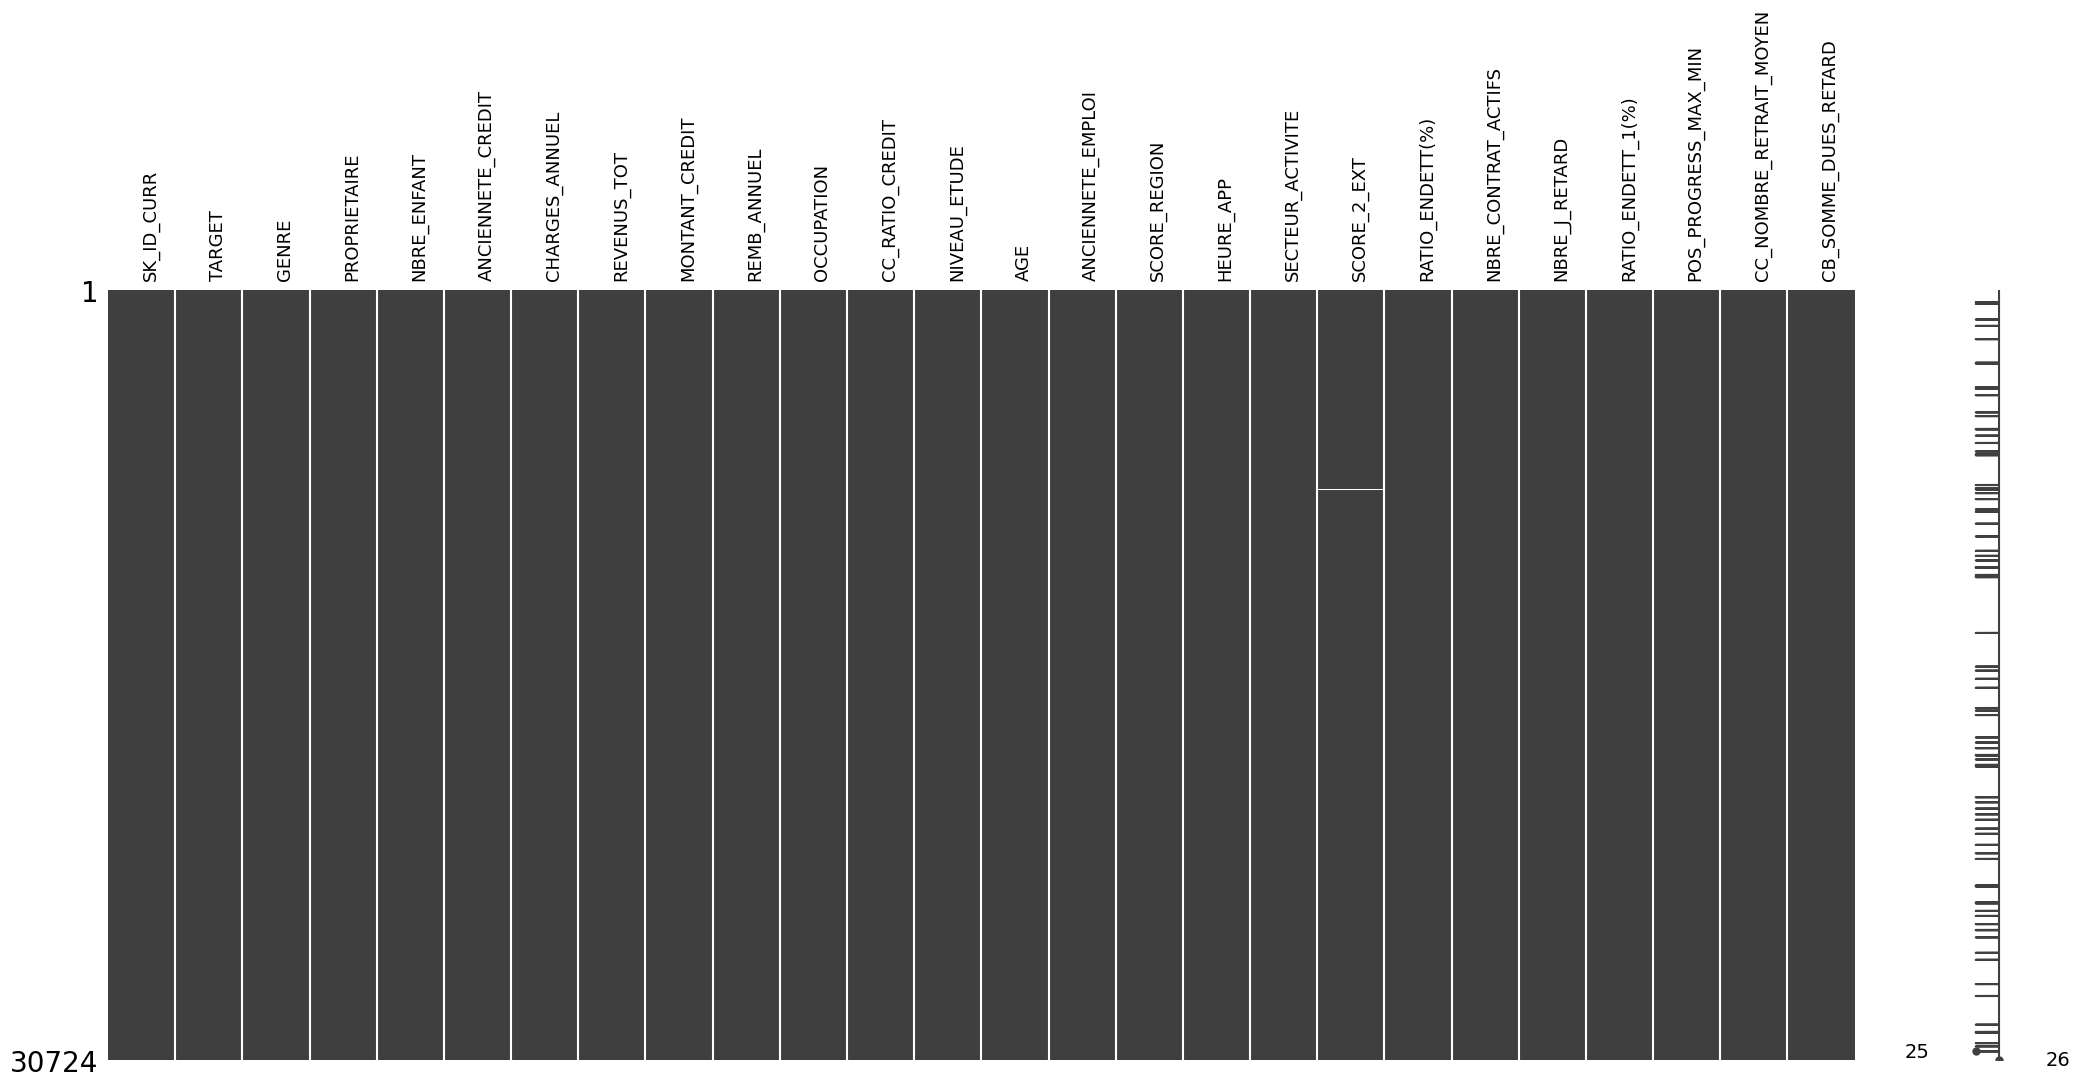

In [ ]:
clean.vm(df, 0.1,'/content/P7_NB/P7_NB_100a.png')

In [ ]:
df.isna().sum()

SK_ID_CURR                   0
TARGET                       0
GENRE                        0
PROPRIETAIRE                 0
NBRE_ENFANT                  0
ANCIENNETE_CREDIT            0
CHARGES_ANNUEL               0
REVENUS_TOT                  0
MONTANT_CREDIT               0
REMB_ANNUEL                  0
OCCUPATION                   0
CC_RATIO_CREDIT            127
NIVEAU_ETUDE                 0
AGE                          0
ANCIENNETE_EMPLOI            0
SCORE_REGION                 0
HEURE_APP                    0
SECTEUR_ACTIVITE             0
SCORE_2_EXT                660
RATIO_ENDETT(%)              0
NBRE_CONTRAT_ACTIFS          0
NBRE_J_RETARD                0
RATIO_ENDETT_1(%)            0
POS_PROGRESS_MAX_MIN         0
CC_NOMBRE_RETRAIT_MOYEN      0
CB_SOMME_DUES_RETARD         0
dtype: int64

In [ ]:
df = df[~(df['CHARGES_ANNUEL'].isna())]

In [ ]:
df['CHARGES_ANNUEL'].describe()

count    3.072390e+05
mean     1.263992e+04
std      2.178758e+05
min     -4.869597e+06
25%      1.539900e+04
50%      2.767950e+04
75%      4.733876e+04
max      5.686097e+07
Name: CHARGES_ANNUEL, dtype: float64

In [ ]:
df['SCORE_2_EXT']=df['SCORE_2_EXT'].fillna(0.5)
df['CC_RATIO_CREDIT']=df['CC_RATIO_CREDIT'].fillna(0.)
df['CHARGES_ANNUEL']=df['CHARGES_ANNUEL'].fillna(2.755800e+04)

# <a name="C3">3. Exploration des données </a>

## <a name="C31">3.1 Analyses univariées </a>

In [ ]:
df.head()

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
0,100002,1,M,Y,0,47.0,24700.5,202500.0,406597.5,24700.5,...,10,Business Entity,0.262949,12.2,3.0,0.0,12.197778,75.000000,0.0,0.0
1,100003,0,F,N,0,77.0,35698.5,270000.0,1293502.5,35698.5,...,11,Education,0.622246,13.2,1.0,0.0,13.221667,91.666667,0.0,0.0
2,100004,0,M,Y,0,27.0,6750.0,67500.0,135000.0,6750.0,...,9,Government and Public Services,0.555912,10.0,0.0,0.0,10.000000,100.000000,0.0,0.0
3,100006,0,F,Y,0,19.0,29686.5,135000.0,312682.5,29686.5,...,17,Business Entity,0.650442,22.0,2.0,0.0,21.990000,75.000000,0.0,0.0
4,100007,0,M,Y,0,77.0,21865.5,121500.0,513000.0,21865.5,...,11,Other Categories,0.322738,18.0,2.0,1.0,17.996296,45.833333,0.0,0.0


- ### Variable TARGET

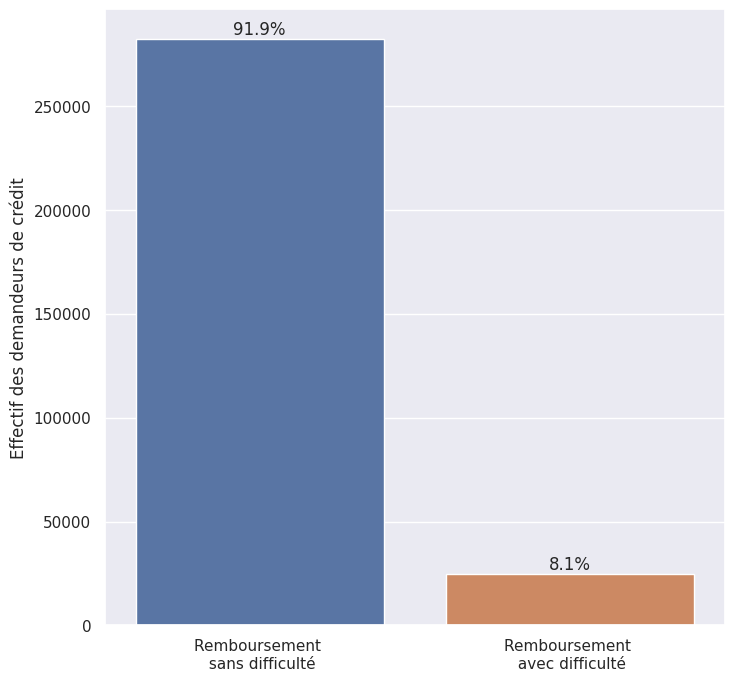

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(data = df, x = 'TARGET')
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_xlabel('')
ax.set_ylabel('Effectif des demandeurs de crédit')
tick_label = ['Remboursement \n sans difficulté', 'Remboursement \n avec difficulté']
ax.set_xticklabels(tick_label)
#plt.title('')
plt.savefig('/content/P7_NB/P7_NB_300.png', bbox_inches = 'tight')


On se retrouve avec un dataset complètement déséquilibré. La catégorie des remboursements avec difficultés, sera la plus difficile à évaluer. Le modèle sera forcé d'avoir un biais. Stratégie : faire veille technologique pour trouver une technique d'échantillonnage afin d'éviter d'entraîner un modèle biaisé.

- ### Variable GENRE

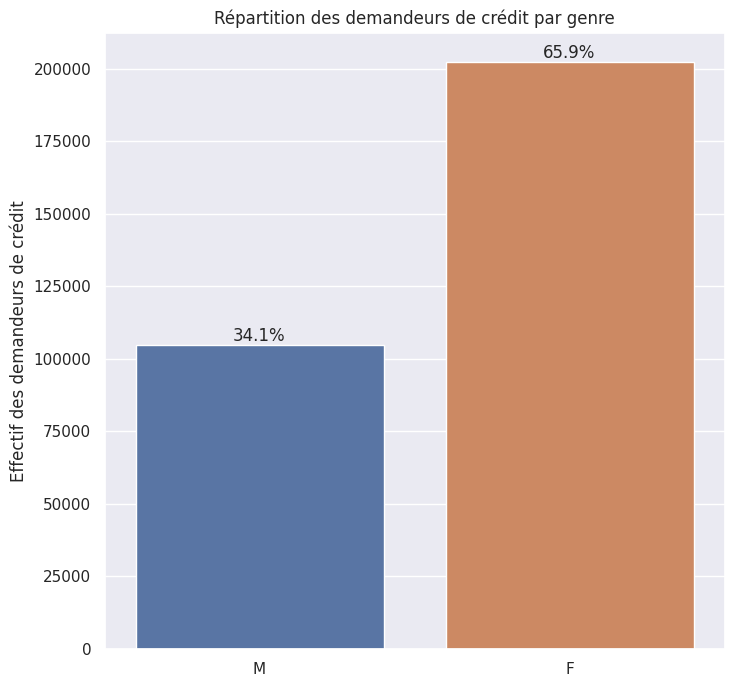

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(data = df, x = 'GENRE')
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_xlabel('')
ax.set_ylabel('Effectif des demandeurs de crédit')
plt.title('Répartition des demandeurs de crédit par genre')
plt.savefig('/content/P7_NB/P7_NB_301.png', bbox_inches = 'tight')

Le dataset est là encore déséquilibré.

- ### Variable OCCUPATION

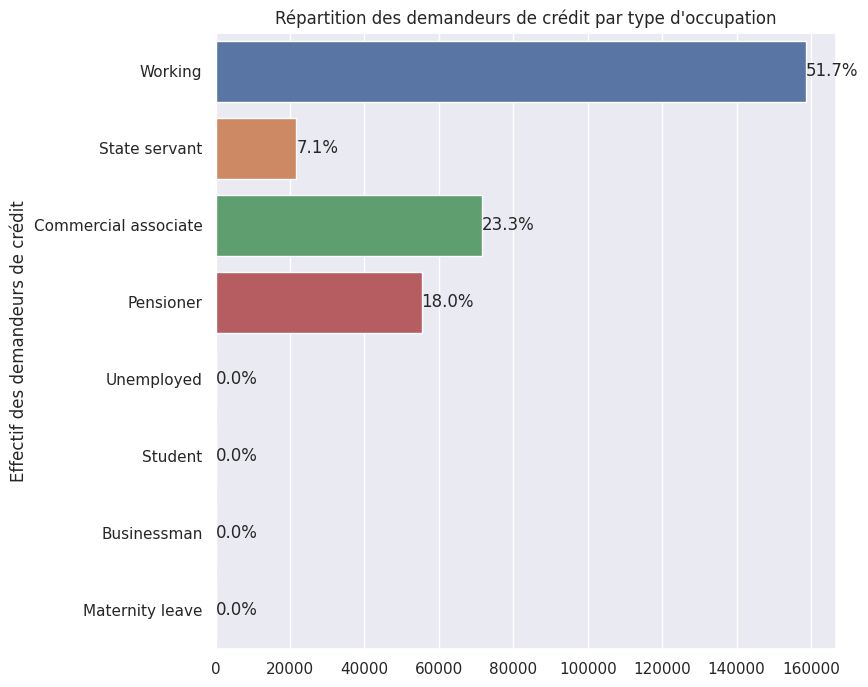

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, y='OCCUPATION')

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Effectif des demandeurs de crédit')
plt.title("Répartition des demandeurs de crédit par type d'occupation")
plt.savefig('/content/P7_NB/P7_NB_308.png', bbox_inches='tight')
plt.show()


La catégorie 'working' n'est pas super parlante. Je pense que la feature ppourrait être supprimé au profit de la feature ORGANIZATION_TYPE.

- ### Variable SECTEUR_ACTIVITE

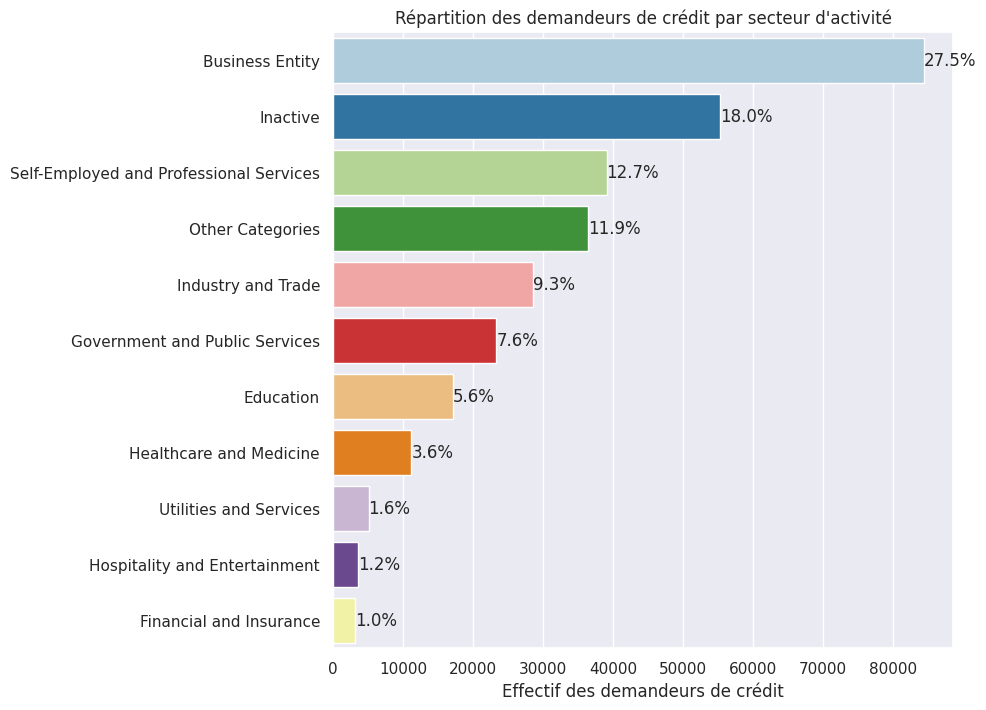

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
order_ = df['SECTEUR_ACTIVITE'].value_counts().index
sns.countplot(data=df, y='SECTEUR_ACTIVITE', palette='Paired', order = order_)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_ylabel('')
ax.set_xlabel('Effectif des demandeurs de crédit')
plt.title("Répartition des demandeurs de crédit par secteur d'activité")
plt.savefig('/content/P7_NB/P7_NB_309.png', bbox_inches = 'tight')

- ### Variable REVENUS_TOT

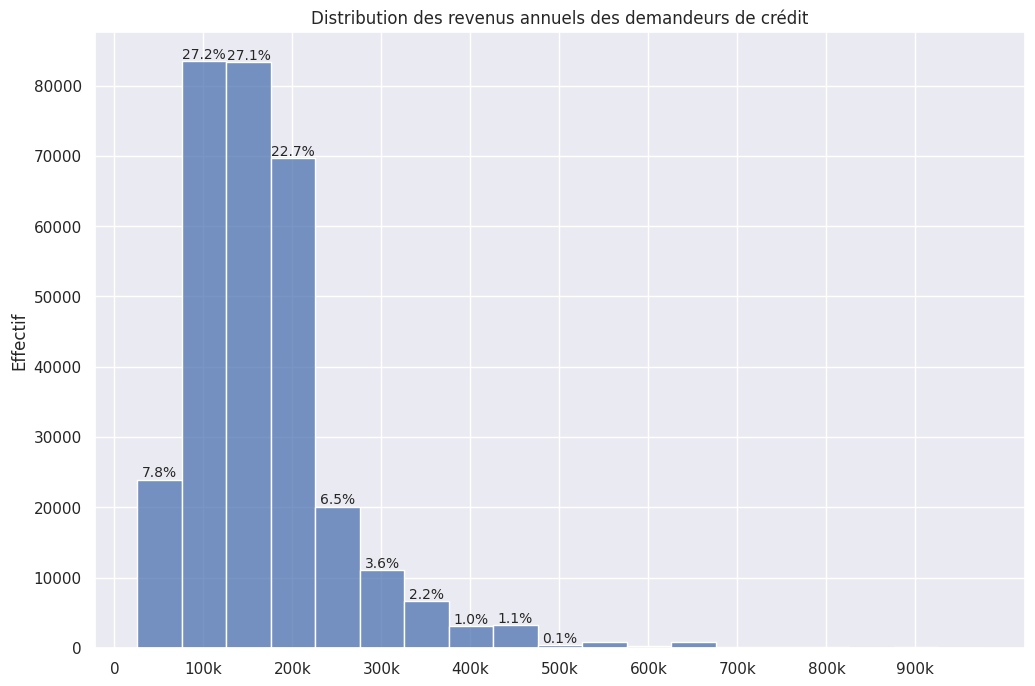

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, x='REVENUS_TOT', binwidth=5e4)
total = len(df)
for p in ax.patches[:10]:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

tick_positions = list(range(0, 1000000, 100000))
tick_labels = ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')
ax.set_ylabel('Effectif')
plt.title('Distribution des revenus annuels des demandeurs de crédit')
plt.savefig('/content/P7_NB/P7_NB_302.png', bbox_inches = 'tight')

plt.show()


- ### Variable 'MONTANT_CREDIT'

In [ ]:
df.describe()

,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,CC_RATIO_CREDIT,AGE,ANCIENNETE_EMPLOI,SCORE_REGION,HEURE_APP,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
count,307239.000000,307239.000000,3.072390e+05,307239.000000,3.072390e+05,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,3.072390e+05,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,3.072390e+05
mean,0.414501,55.663135,1.263992e+04,167153.366381,5.985650e+05,27081.581733,9.242488,44.548895,5.428562,2.052750,12.062518,5.142961e-01,18.104754,1.485332,5.638905,10.100121,72.332598,0.435687,1.912735e+02
std,0.711230,31.229482,2.178758e+05,89485.816933,4.019105e+05,14411.171115,22.827409,12.127397,6.415209,0.508835,3.265541,1.908570e-01,9.452183,1.647712,85.154854,131.832731,35.432039,2.082347,1.527778e+04
min,0.000000,0.000000,-4.869597e+06,25650.000000,4.500000e+04,1615.500000,-8.480000,21.000000,0.000000,1.000000,0.000000,8.173617e-08,0.800000,0.000000,0.000000,-3739.756104,0.000000,0.000000,0.000000e+00
25%,0.000000,27.000000,1.539900e+04,112500.000000,2.700000e+05,16524.000000,0.000000,34.000000,1.000000,2.000000,10.000000,3.928642e-01,11.500000,0.000000,0.000000,11.304000,44.444444,0.000000,0.000000e+00
50%,0.000000,58.000000,2.767950e+04,144000.000000,5.135310e+05,24903.000000,0.000000,44.000000,3.000000,2.000000,12.000000,5.653973e-01,16.300000,1.000000,0.000000,18.970389,91.666667,0.000000,0.000000e+00
75%,1.000000,86.000000,4.733876e+04,202500.000000,8.086500e+05,34596.000000,0.000000,55.000000,8.000000,2.000000,14.000000,6.633730e-01,22.900000,2.000000,0.560584,31.340709,100.000000,0.000000,0.000000e+00
max,4.000000,96.000000,5.686097e+07,967500.000000,4.050000e+06,258025.500000,213.880000,70.000000,50.000000,3.000000,23.000000,8.549997e-01,187.600000,20.000000,4092.000000,36102.202857,100.000000,118.250000,3.756681e+06


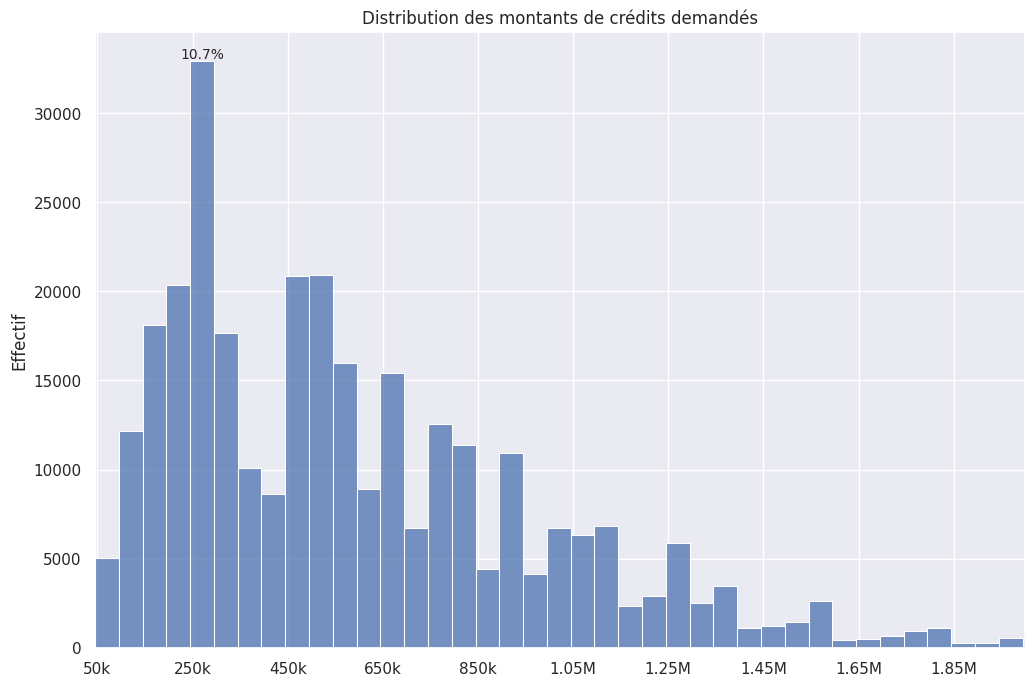

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='MONTANT_CREDIT', binwidth=5e4)
tick_positions = list(np.arange(5e4, 2e6, 2e5))
tick_labels = []
for pos in tick_positions:
    if pos >= 1e6:
        label = '{}M'.format(round((pos / 1e6),2))
    else:
        label = '{}k'.format(int(pos / 1e3))
    tick_labels.append(label)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(45000, 2e6)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

# Find the tallest bar
tallest_height = 0
tallest_bar = None

for patch in ax.patches:
    height = patch.get_height()
    if height > tallest_height:
        tallest_height = height
        tallest_bar = patch

# Annotate the tallest bar with its percentage
percentage = tallest_height /len(df)* 100
x_position = tallest_bar.get_x() + tallest_bar.get_width() / 2
y_position = tallest_bar.get_height()

ax.annotate(f'{percentage:.1f}%', (x_position, y_position), ha='center', va='bottom', size = 10)


ax.set_ylabel('Effectif')
plt.title('Distribution des montants de crédits demandés')
plt.savefig('/content/P7_NB/P7_NB_303.png', bbox_inches = 'tight')


10,7% du dataset, demande des crédits compris entre 250k et 300k.

- ### Variable REMB_ANNUEL

In [ ]:
df.describe()

,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,CC_RATIO_CREDIT,AGE,ANCIENNETE_EMPLOI,SCORE_REGION,HEURE_APP,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
count,307239.000000,307239.000000,3.072390e+05,307239.000000,3.072390e+05,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,3.072390e+05,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,307239.000000,3.072390e+05
mean,0.414501,55.663135,1.263992e+04,167153.366381,5.985650e+05,27081.581733,9.242488,44.548895,5.428562,2.052750,12.062518,5.142961e-01,18.104754,1.485332,5.638905,10.100121,72.332598,0.435687,1.912735e+02
std,0.711230,31.229482,2.178758e+05,89485.816933,4.019105e+05,14411.171115,22.827409,12.127397,6.415209,0.508835,3.265541,1.908570e-01,9.452183,1.647712,85.154854,131.832731,35.432039,2.082347,1.527778e+04
min,0.000000,0.000000,-4.869597e+06,25650.000000,4.500000e+04,1615.500000,-8.480000,21.000000,0.000000,1.000000,0.000000,8.173617e-08,0.800000,0.000000,0.000000,-3739.756104,0.000000,0.000000,0.000000e+00
25%,0.000000,27.000000,1.539900e+04,112500.000000,2.700000e+05,16524.000000,0.000000,34.000000,1.000000,2.000000,10.000000,3.928642e-01,11.500000,0.000000,0.000000,11.304000,44.444444,0.000000,0.000000e+00
50%,0.000000,58.000000,2.767950e+04,144000.000000,5.135310e+05,24903.000000,0.000000,44.000000,3.000000,2.000000,12.000000,5.653973e-01,16.300000,1.000000,0.000000,18.970389,91.666667,0.000000,0.000000e+00
75%,1.000000,86.000000,4.733876e+04,202500.000000,8.086500e+05,34596.000000,0.000000,55.000000,8.000000,2.000000,14.000000,6.633730e-01,22.900000,2.000000,0.560584,31.340709,100.000000,0.000000,0.000000e+00
max,4.000000,96.000000,5.686097e+07,967500.000000,4.050000e+06,258025.500000,213.880000,70.000000,50.000000,3.000000,23.000000,8.549997e-01,187.600000,20.000000,4092.000000,36102.202857,100.000000,118.250000,3.756681e+06


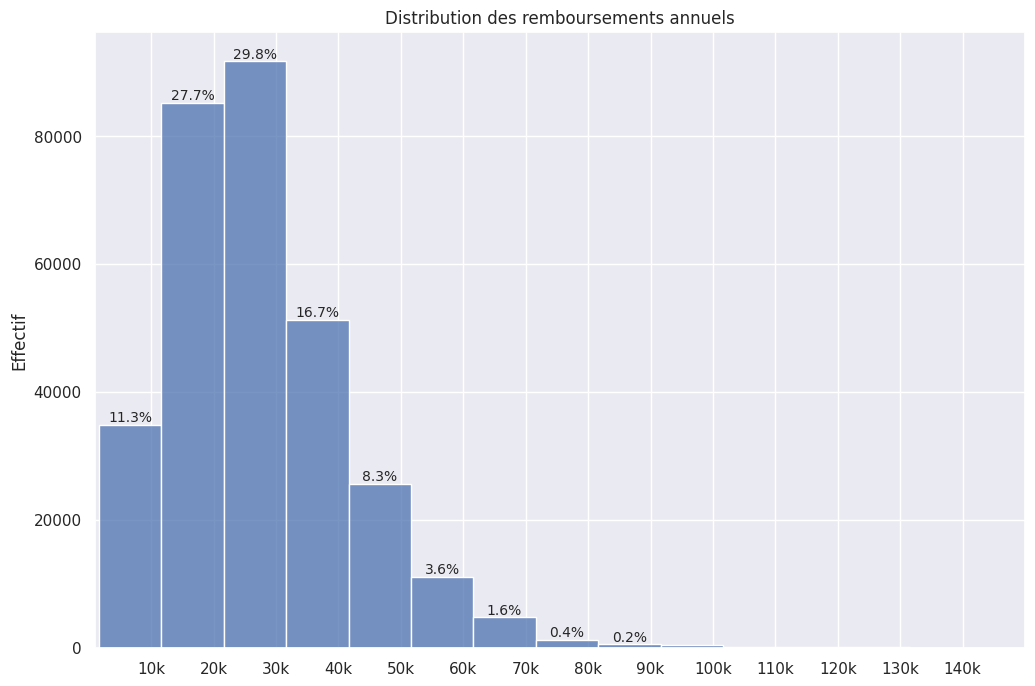

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='REMB_ANNUEL', binwidth=1e4)
tick_positions = list(np.arange(0, 1.5e5, 1e4))
tick_labels = []
for pos in tick_positions:
    if pos >= 1e6:
        label = '{}M'.format(round((pos / 1e6),2))
    else:
        label = '{}k'.format(int(pos / 1e3))
    tick_labels.append(label)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(1000, 1.5e5)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total = len(df)
for p in ax.patches[:9]:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_ylabel('Effectif')
plt.title('Distribution des remboursements annuels')
plt.savefig('/content/P7_NB/P7_NB_304.png', bbox_inches = 'tight')


- ### Variable 'AGE'

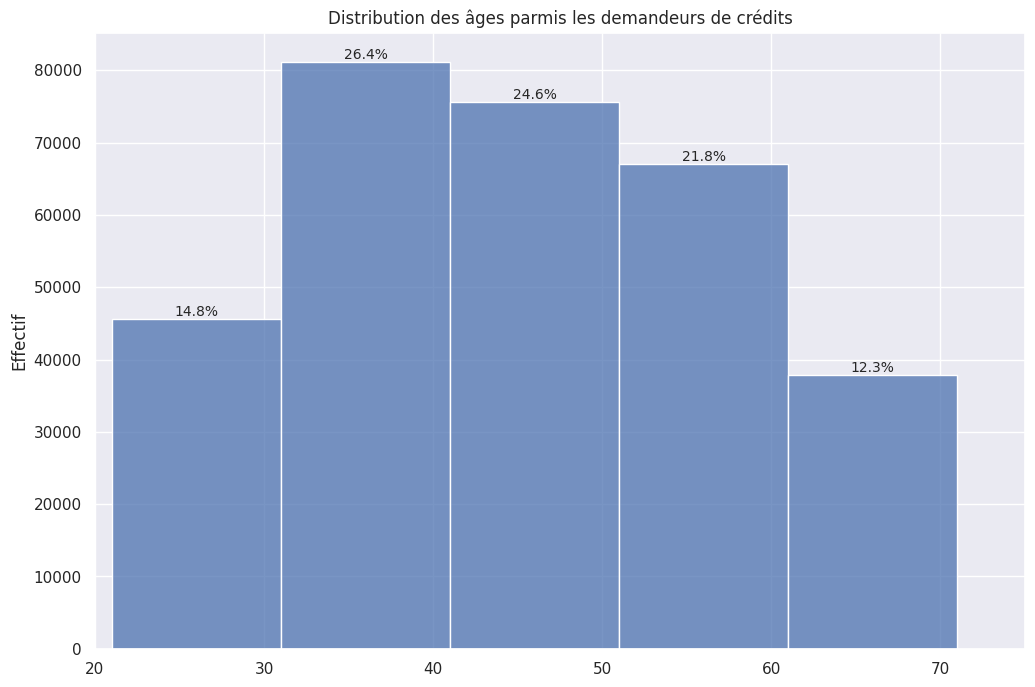

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='AGE', binwidth= 10)
tick_positions = list(np.arange(20, 90, 10))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(20, 75)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total = len(df)
for p in ax.patches[:9]:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_ylabel('Effectif')
plt.title('Distribution des âges parmis les demandeurs de crédits')
plt.savefig('/content/P7_NB/P7_NB_305.png', bbox_inches = 'tight')

- ### Variable ANCIENNETE_EMPLOI

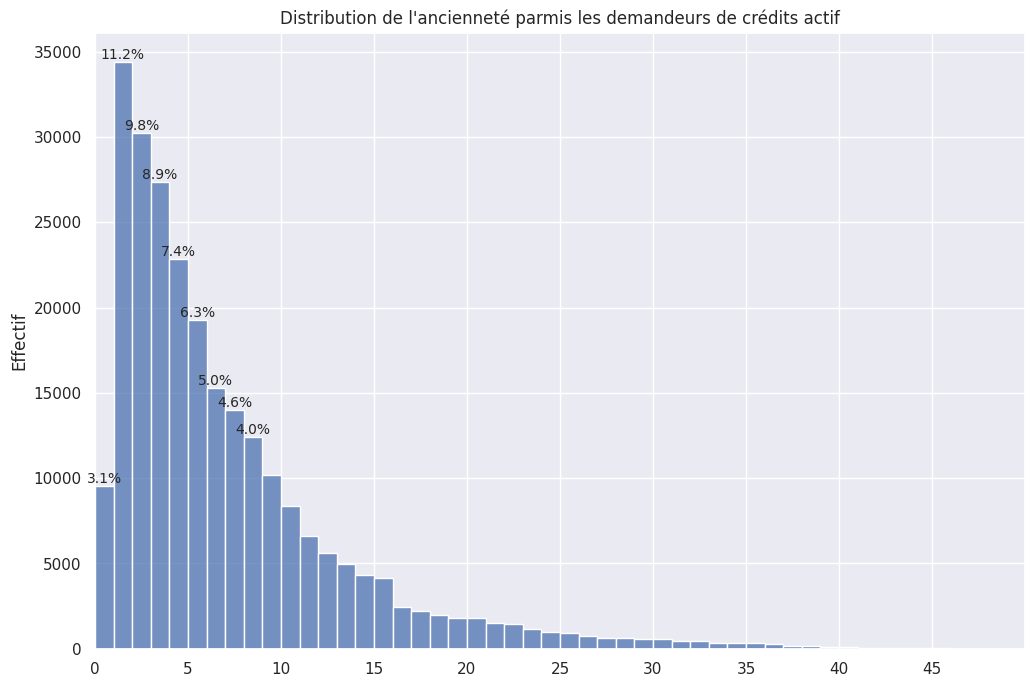

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
data_ = df[df['SECTEUR_ACTIVITE'] != 'Inactive']
sns.histplot(data=data_, x='ANCIENNETE_EMPLOI', binwidth = 1)
tick_positions = list(np.arange(0, 50, 5))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(0, 50)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total = len(df)
for p in ax.patches[:9]:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_ylabel('Effectif')
plt.title('Distribution de l\'ancienneté parmis les demandeurs de crédits actif')
plt.savefig('/content/P7_NB/P7_NB_306.png', bbox_inches = 'tight')

In [ ]:
df.head()

,SK_ID_CURR,TARGET,GENRE,PROPRIETAIRE,NBRE_ENFANT,ANCIENNETE_CREDIT,CHARGES_ANNUEL,REVENUS_TOT,MONTANT_CREDIT,REMB_ANNUEL,...,HEURE_APP,SECTEUR_ACTIVITE,SCORE_2_EXT,RATIO_ENDETT(%),NBRE_CONTRAT_ACTIFS,NBRE_J_RETARD,RATIO_ENDETT_1(%),POS_PROGRESS_MAX_MIN,CC_NOMBRE_RETRAIT_MOYEN,CB_SOMME_DUES_RETARD
0,100002,1,M,Y,0,47.0,24700.5,202500.0,406597.5,24700.5,...,10,Business Entity,0.262949,12.2,3.0,0.0,12.197778,75.000000,0.0,0.0
1,100003,0,F,N,0,77.0,35698.5,270000.0,1293502.5,35698.5,...,11,Education,0.622246,13.2,1.0,0.0,13.221667,91.666667,0.0,0.0
2,100004,0,M,Y,0,27.0,6750.0,67500.0,135000.0,6750.0,...,9,Government and Public Services,0.555912,10.0,0.0,0.0,10.000000,100.000000,0.0,0.0
3,100006,0,F,Y,0,19.0,29686.5,135000.0,312682.5,29686.5,...,17,Business Entity,0.650442,22.0,2.0,0.0,21.990000,75.000000,0.0,0.0
4,100007,0,M,Y,0,77.0,21865.5,121500.0,513000.0,21865.5,...,11,Other Categories,0.322738,18.0,2.0,1.0,17.996296,45.833333,0.0,0.0


- ### Variable Endett_0_%

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT',
       'ANCIENNETE_CREDIT', 'CHARGES_ANNUEL', 'REVENUS_TOT', 'MONTANT_CREDIT',
       'REMB_ANNUEL', 'OCCUPATION', 'CC_RATIO_CREDIT', 'NIVEAU_ETUDE', 'AGE',
       'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP', 'SECTEUR_ACTIVITE',
       'SCORE_2_EXT', 'RATIO_ENDETT(%)', 'NBRE_CONTRAT_ACTIFS',
       'NBRE_J_RETARD', 'RATIO_ENDETT_1(%)', 'POS_PROGRESS_MAX_MIN',
       'CC_NOMBRE_RETRAIT_MOYEN', 'CB_SOMME_DUES_RETARD'],
      dtype='object')

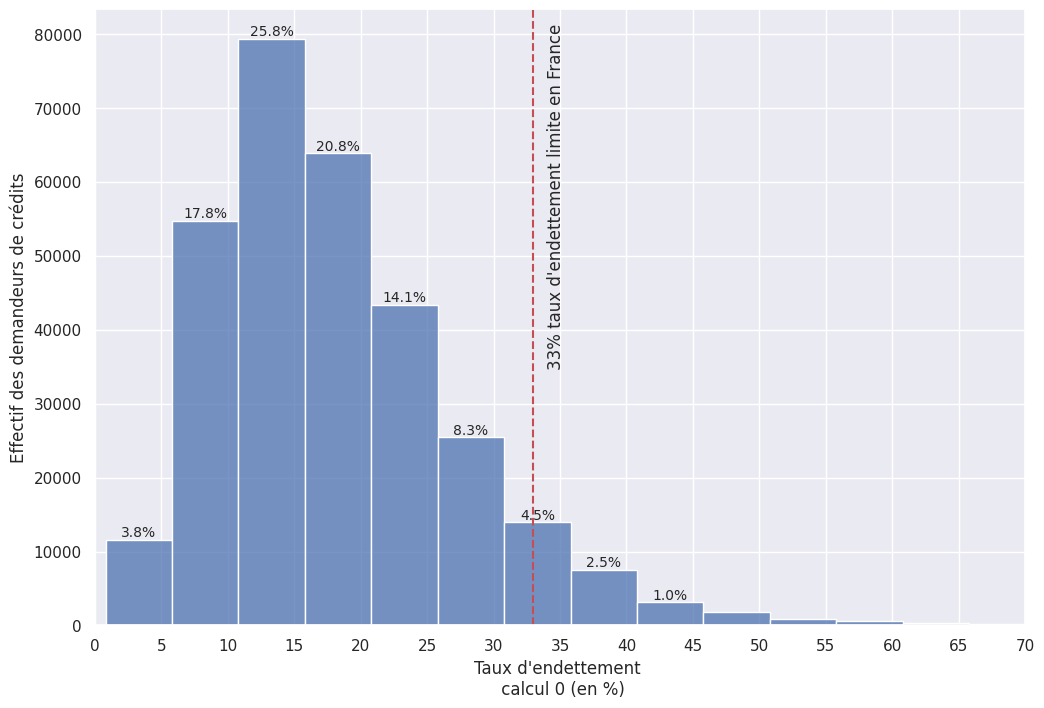

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='RATIO_ENDETT(%)', binwidth = 5)
tick_positions = list(np.arange(0, 150, 5))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(0, 70)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total = len(df)
for p in ax.patches[:9]:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_xlabel('Taux d\'endettement \n calcul 0 (en %)')
ax.set_ylabel('Effectif des demandeurs de crédits')
# Add vertical line at x=33
ax.axvline(x=33, color='r', linestyle='--')

# Annotate the line
ax.annotate('33% taux d\'endettement limite en France', (33, ax.get_ylim()[1]),
             xytext=(10, -10), textcoords='offset points',
             ha='left', va='top', rotation=90)

plt.savefig('/content/P7_NB/P7_NB_307.png', bbox_inches = 'tight')

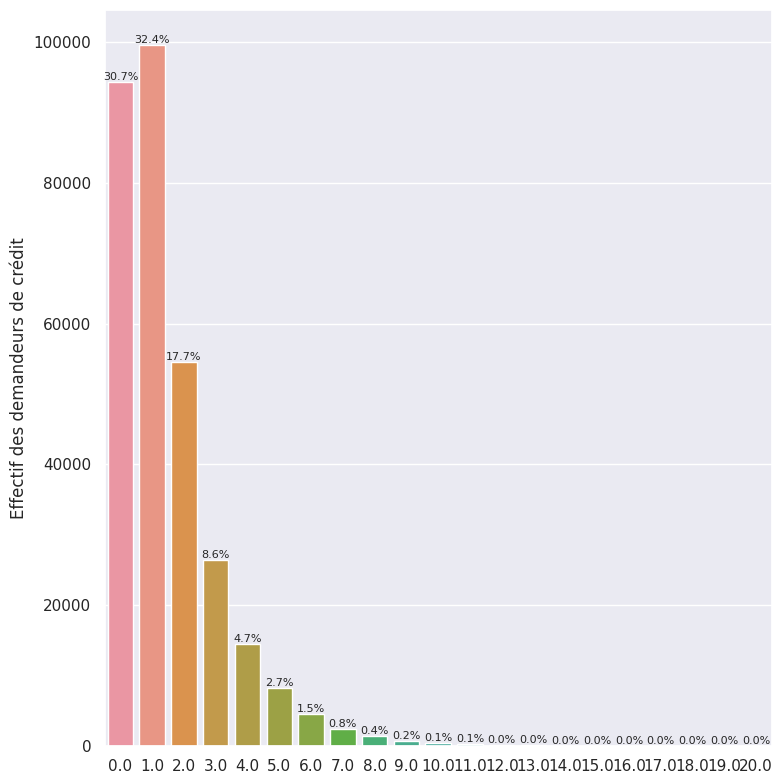

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='NBRE_CONTRAT_ACTIFS')

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=8)

ax.set_ylabel('Effectif des demandeurs de crédit')
ax.set_xlabel('')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate and align the x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent label overlapping
plt.savefig('/content/P7_NB/P7_NB_310a.png', bbox_inches = 'tight')

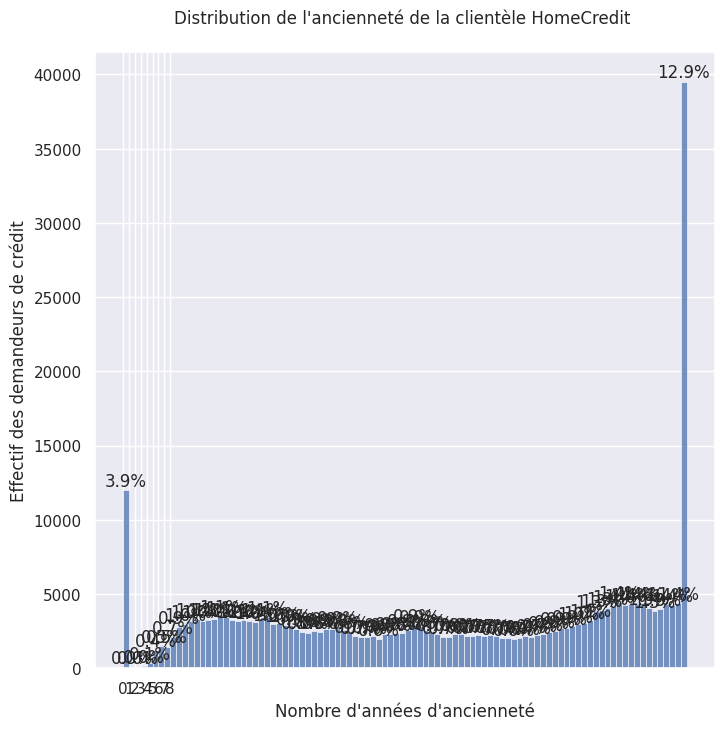

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data = df, x = 'ANCIENNETE_CREDIT', binwidth = 1)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_xlabel('Nombre d\'années d\'ancienneté')
ax.set_ylabel('Effectif des demandeurs de crédit')
tick_positions = list(np.arange(0, 9, 1))

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_label)
plt.title('Distribution de l\'ancienneté de la clientèle HomeCredit \n ')
plt.savefig('/content/P7_NB/P7_NB_311a.png', bbox_inches = 'tight')

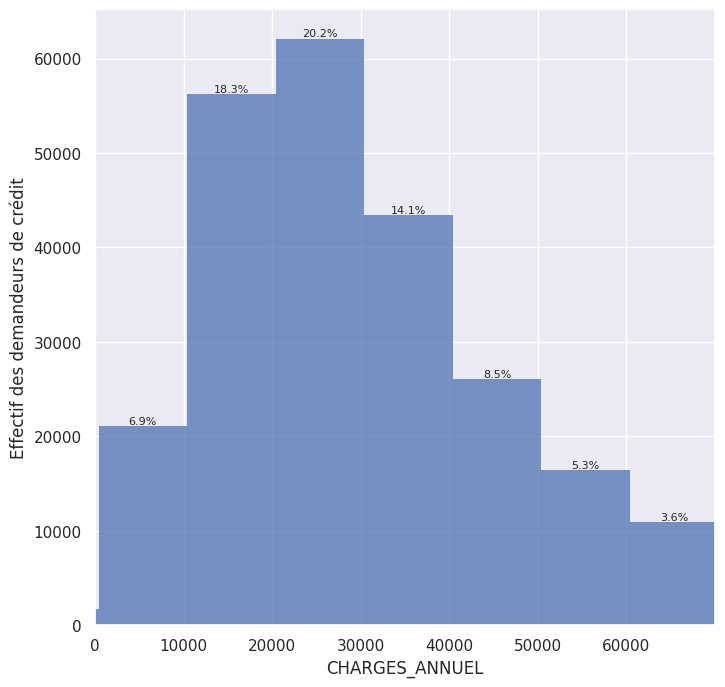

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data = df, x = 'CHARGES_ANNUEL', binwidth = 1e4)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 8)


ax.set_ylabel('Effectif des demandeurs de crédit')

ax.set_xlim(0, 7e4)
tick_positions = list(np.arange(0, 7e4, 1e4))
#tick_labels = ['0', '100k', '200k', '300k', '400k']
ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)

#plt.title('Distribution du montant des dettes de cartes de crédit des clients HomeCredit')
plt.savefig('/content/P7_NB/P7_NB_313a.png', bbox_inches = 'tight')

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT',
       'ANCIENNETE_CREDIT', 'CHARGES_ANNUEL', 'REVENUS_TOT', 'MONTANT_CREDIT',
       'REMB_ANNUEL', 'OCCUPATION', 'CC_RATIO_CREDIT', 'NIVEAU_ETUDE', 'AGE',
       'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP', 'SECTEUR_ACTIVITE',
       'SCORE_2_EXT', 'RATIO_ENDETT(%)', 'NBRE_CONTRAT_ACTIFS',
       'NBRE_J_RETARD', 'RATIO_ENDETT_1(%)', 'POS_PROGRESS_MAX_MIN',
       'CC_NOMBRE_RETRAIT_MOYEN', 'CB_SOMME_DUES_RETARD'],
      dtype='object')

In [ ]:
def dpd_status(value):
    if value == 0:
        return 'Pas de retard de paiement'
    elif 0 < value <= 30:
        return 'Retard de paiement léger'
    else:
        return 'Retard de paiement important'

df['NBRE_J_RETARD'] = df['NBRE_J_RETARD'].map(dpd_status)

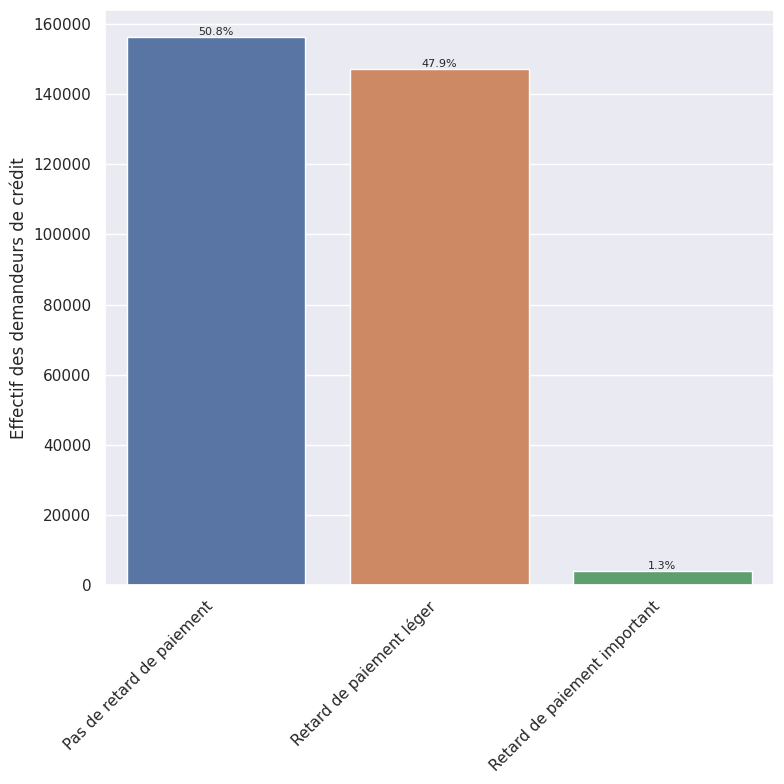

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='NBRE_J_RETARD')

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=8)

ax.set_ylabel('Effectif des demandeurs de crédit')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate and align the x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent label overlapping

plt.savefig('/content/P7_NB/P7_NB_314a.png', bbox_inches='tight')
plt.show()


In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT',
       'ANCIENNETE_CREDIT', 'CHARGES_ANNUEL', 'REVENUS_TOT', 'MONTANT_CREDIT',
       'REMB_ANNUEL', 'OCCUPATION', 'CC_RATIO_CREDIT', 'NIVEAU_ETUDE', 'AGE',
       'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP', 'SECTEUR_ACTIVITE',
       'SCORE_2_EXT', 'RATIO_ENDETT(%)', 'NBRE_CONTRAT_ACTIFS',
       'NBRE_J_RETARD', 'RATIO_ENDETT_1(%)', 'POS_PROGRESS_MAX_MIN',
       'CC_NOMBRE_RETRAIT_MOYEN', 'CB_SOMME_DUES_RETARD'],
      dtype='object')

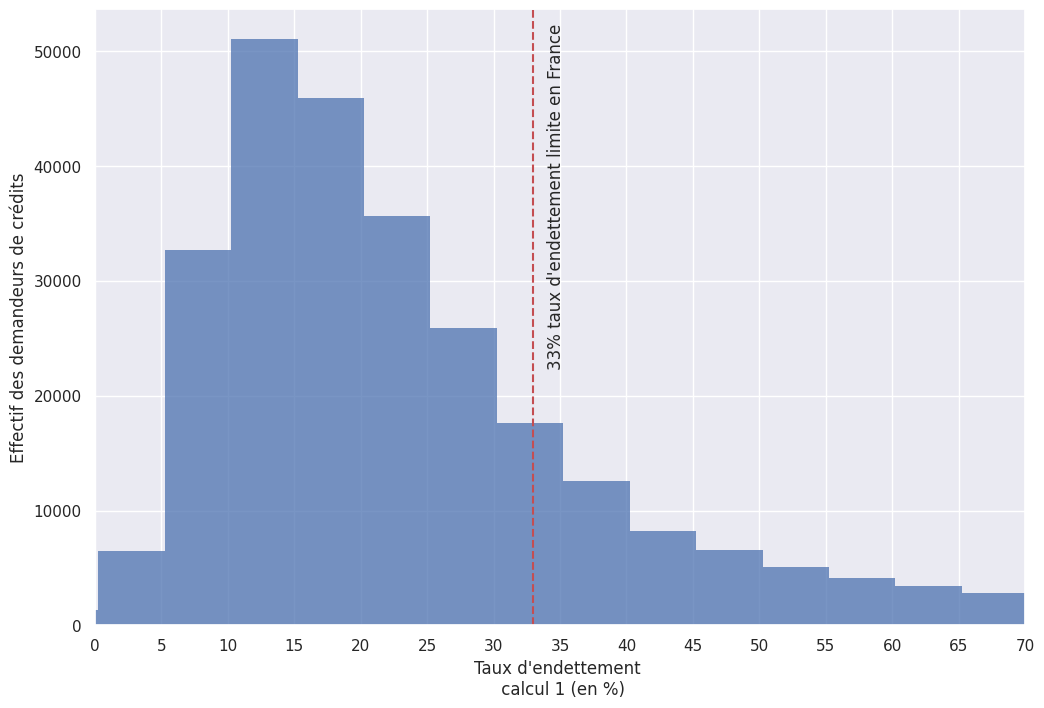

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='RATIO_ENDETT_1(%)', binwidth = 5)
tick_positions = list(np.arange(0, 150, 5))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(0, 70)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total = len(df)
for p in ax.patches[:9]:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_xlabel('Taux d\'endettement \n calcul 1 (en %)')
ax.set_ylabel('Effectif des demandeurs de crédits')
# Add vertical line at x=33
ax.axvline(x=33, color='r', linestyle='--')

# Annotate the line
ax.annotate('33% taux d\'endettement limite en France', (33, ax.get_ylim()[1]),
             xytext=(10, -10), textcoords='offset points',
             ha='left', va='top', rotation=90)

plt.savefig('/content/P7_NB/P7_NB_307.png', bbox_inches = 'tight')

## <a name="C32">3.2 Analyses bivariées et recherche des corrélations </a>

### <a name="C321">3.2.1 Explication de la variable TARGET </a>

- #### TARGET vs OCCUPATION

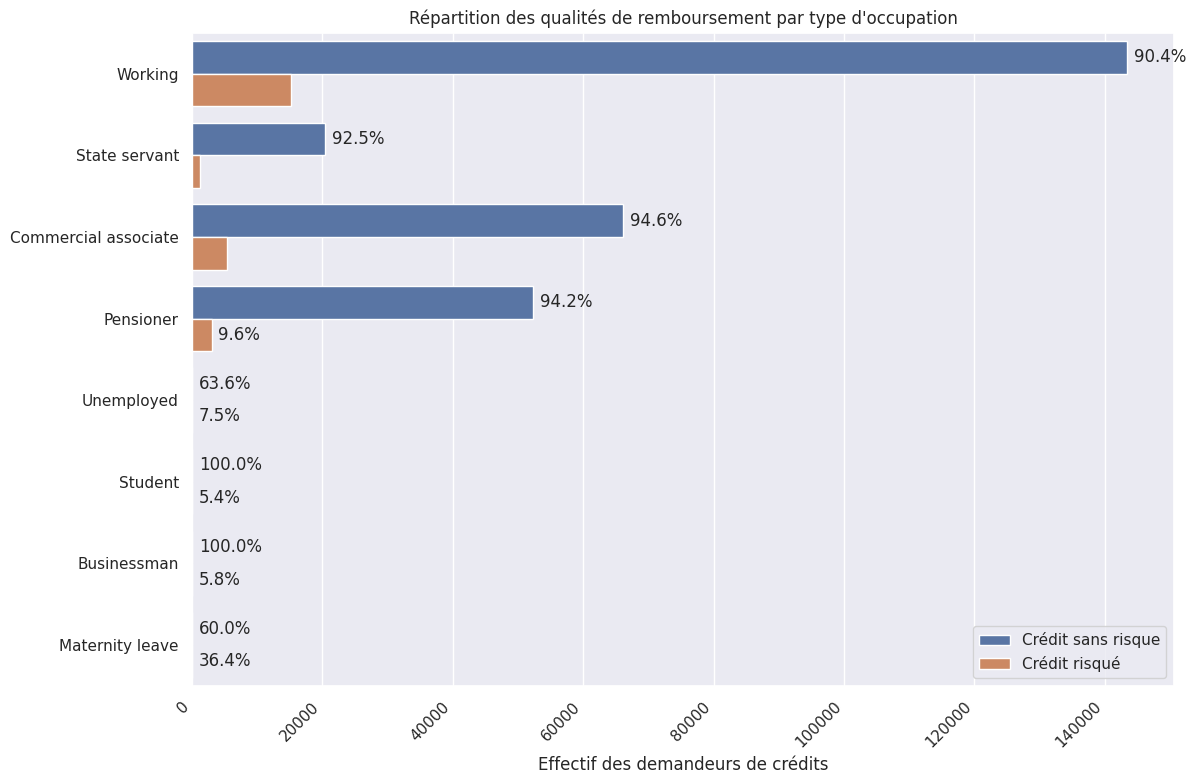

In [ ]:
# Your existing code to create the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, y='OCCUPATION', hue='TARGET')

plt.ylabel('')
plt.xlabel('Effectif des demandeurs de crédits')
plt.title('Répartition des qualités de remboursement par type d\'occupation')

# Customize the legend labels
legend_labels = ['Crédit sans risque', 'Crédit risqué']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels, loc='lower right')

plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels
plt.tight_layout()  # Adjust the layout to prevent label overlapping

# Calculate and add percentage annotations to each bar
total_counts = df['OCCUPATION'].value_counts()
count_by_target = df.groupby('OCCUPATION')['TARGET'].value_counts()
organization = total_counts.index
count = 0

for activity in organization:
  total = total_counts[activity]
  for j, p in enumerate(ax.patches[count::11]):
    #print(j)
    count_target = count_by_target[activity][j]
    #print(count_target)
    percentage = '{:.1f}%'.format(100 * (count_target/total))
    ax.annotate(percentage, (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')
  count += 1
plt.savefig('/content/P7_NB/P7_NB_321.png', bbox_inches = 'tight')
plt.show()


- #### TARGET vs GENRE

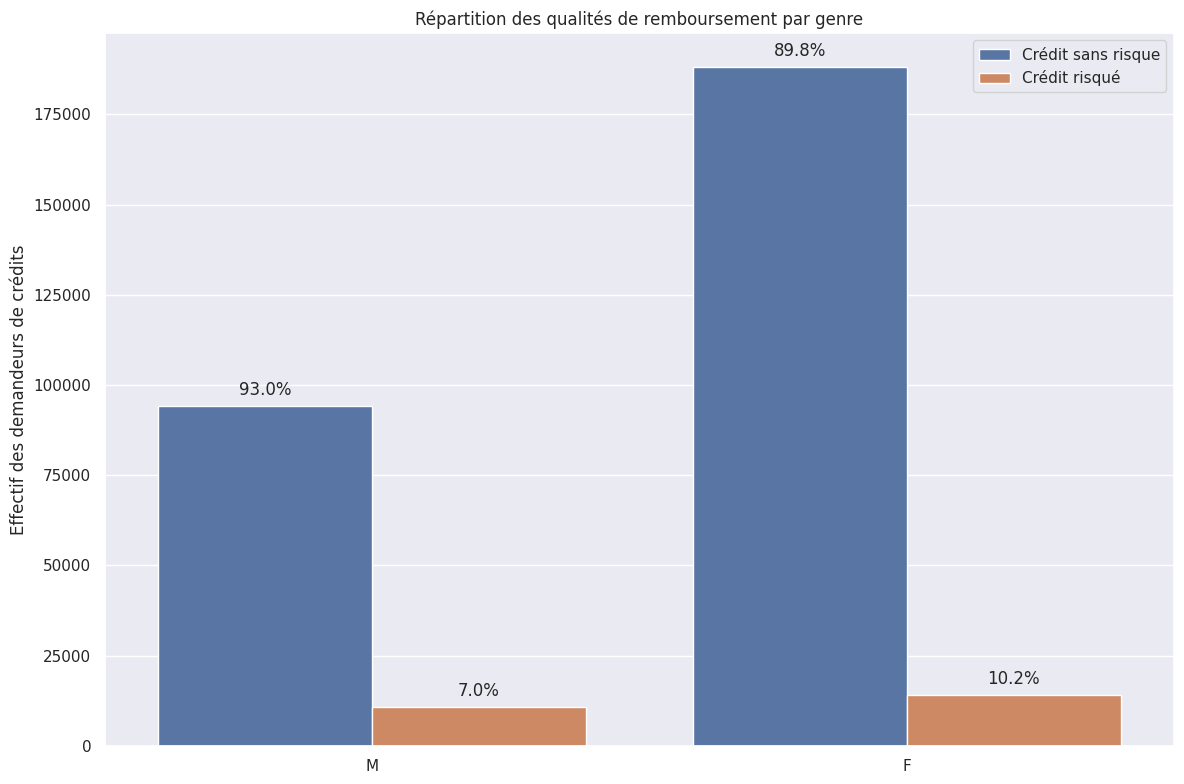

In [ ]:
# Your existing code to create the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='GENRE', hue='TARGET')

plt.xlabel('')
plt.ylabel('Effectif des demandeurs de crédits')
plt.title('Répartition des qualités de remboursement par genre')

# Customize the legend labels
legend_labels = ['Crédit sans risque', 'Crédit risqué']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels)


plt.tight_layout()  # Adjust the layout to prevent label overlapping

# Calculate and add percentage annotations to each bar
total_counts = df['GENRE'].value_counts()
count_by_target = df.groupby('GENRE')['TARGET'].value_counts()
organization = total_counts.index
count = 0

for activity in organization:
  total = total_counts[activity]
  for j, p in enumerate(ax.patches[count::2]):
    #print(j)
    count_target = count_by_target[activity][j]
    #print(count_target)
    percentage = '{:.1f}%'.format(100 * (count_target/total))
    # Annotate the bar with the percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
  count += 1
plt.savefig('/content/P7_NB/P7_NB_322.png', bbox_inches = 'tight')
plt.show()


- #### TARGET vs REVENUS_TOT

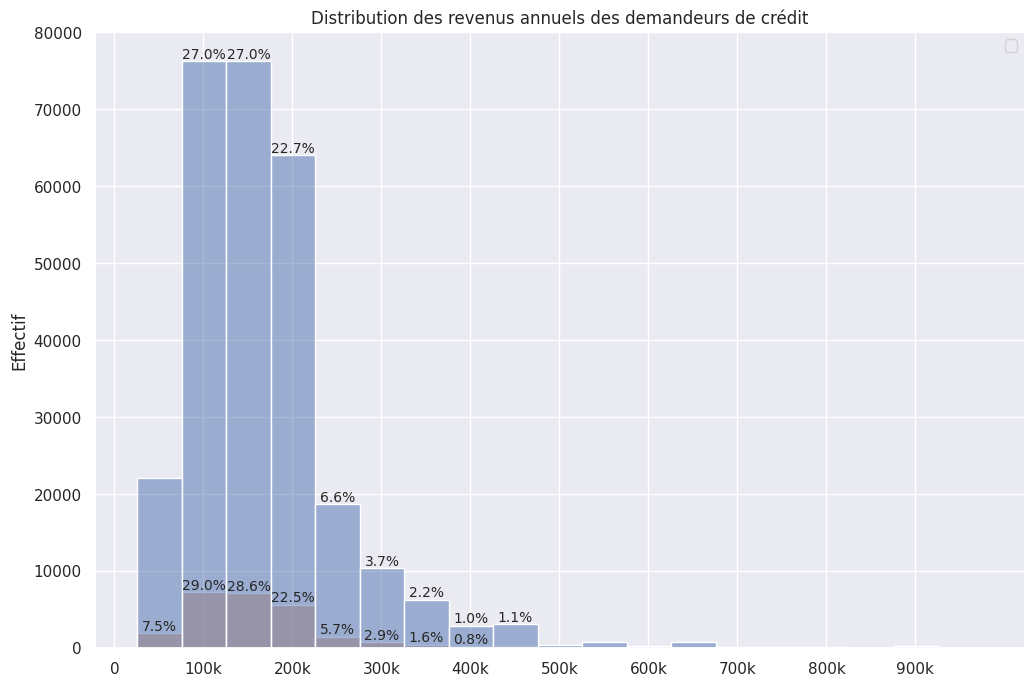

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='REVENUS_TOT', hue='TARGET',  binwidth=5e4)


total_counts = df['TARGET'].value_counts()
for p in ax.patches[:8]:
    total = total_counts[1]
    #print(total)
    #print(p.get_height())
    percentage = '{:.1f}%'.format(100 * (p.get_height()/total))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

for p in ax.patches[20:28]:
    total = total_counts[0]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

tick_positions = list(range(0, 1000000, 100000))
tick_labels = ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
# Customize the legend labels
legend_labels = ['Crédit sans risque', 'Crédit risqué']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels)
# Customize tick parameters
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')
ax.set_ylabel('Effectif')
plt.title('Distribution des revenus annuels des demandeurs de crédit')
plt.savefig('/content/P7_NB/P7_NB_323.png', bbox_inches = 'tight')

- #### TARGET vs MONTANT_CREDIT

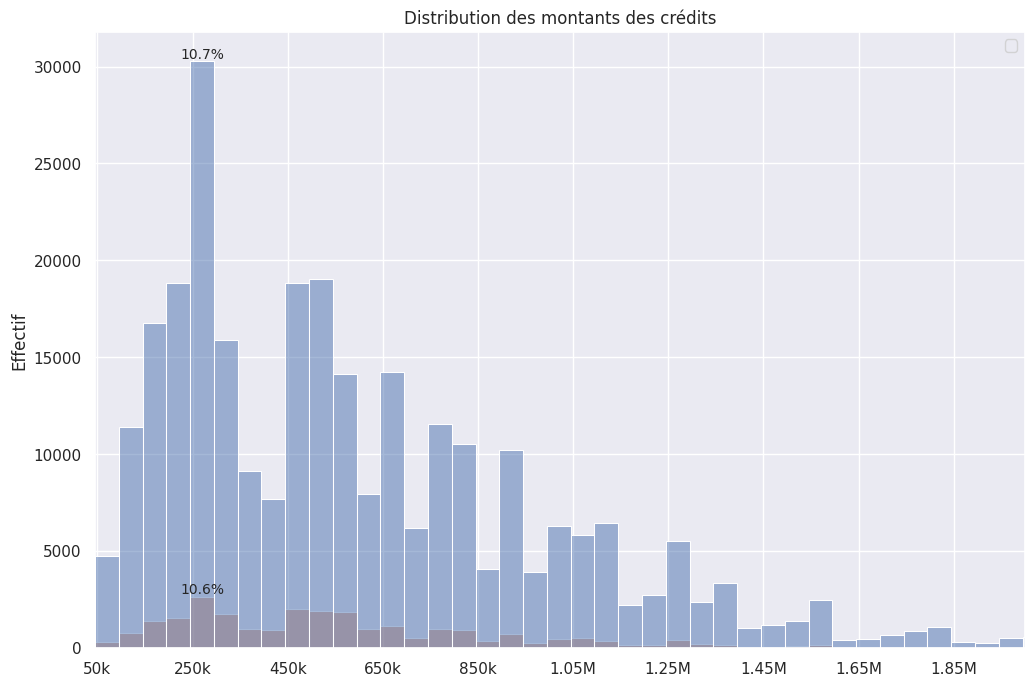

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='MONTANT_CREDIT', hue='TARGET',  binwidth=5e4)
# Customize tick parameters
ax.set_xlim(45000, 2e6)

total_counts = df['TARGET'].value_counts()
p = ax.patches[4]
total = total_counts[1]
    #print(total)
    #print(p.get_height())
percentage = '{:.1f}%'.format(100 * (p.get_height()/total))
x = p.get_x() + p.get_width() / 2
y = p.get_height()
ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

total_counts = df['TARGET'].value_counts()
p = ax.patches[85]
total = total_counts[0]
    #print(total)
    #print(p.get_height())
percentage = '{:.1f}%'.format(100 * (p.get_height()/total))
x = p.get_x() + p.get_width() / 2
y = p.get_height()
ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)


tick_positions = list(np.arange(5e4, 2e6, 2e5))
tick_labels = []
for pos in tick_positions:
    if pos >= 1e6:
        label = '{}M'.format(round((pos / 1e6),2))
    else:
        label = '{}k'.format(int(pos / 1e3))
    tick_labels.append(label)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
# Customize the legend labels
legend_labels = ['Crédit sans risque', 'Crédit risqué']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels)
# Customize tick parameters
ax.set_xlim(45000, 2e6)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')
ax.set_ylabel('Effectif')
plt.title('Distribution des montants des crédits')
plt.savefig('/content/P7_NB/P7_NB_324.png', bbox_inches = 'tight')

In [ ]:
len(ax.patches)

162

- #### TARGET vs ENDETT_0

- #### TARGET vs 'AGE'

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='AGE', binwidth= 10, hue = 'TARGET')
tick_positions = list(np.arange(20, 90, 10))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(20, 75)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total_counts = df['TARGET'].value_counts()
for p in ax.patches[:5]:
    total = total_counts[1]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

l = int(len(ax.patches)/2)
for p in ax.patches[l:l+5]:
    total = total_counts[0]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_ylabel('Effectif')
plt.title('Distribution des âges parmis les demandeurs de crédits')
plt.savefig('/content/P7_NB/P7_NB_326.png', bbox_inches = 'tight')

- #### TARGET vs ANCIENNETE_EMPLOI

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
data_ = df[df['ORGANIZATION_TYPE'] != 'Inactive']
sns.histplot(data=data_, x='ANCIENNETE_EMPLOI', binwidth = 1, hue = 'TARGET')
tick_positions = list(np.arange(0, 50, 5))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(0, 50)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')


ax.set_ylabel('Effectif')
plt.title('Distribution de l\'ancienneté parmis les demandeurs de crédits actif')
plt.savefig('/content/P7_NB/P7_NB_327.png', bbox_inches = 'tight')

In [ ]:
df.head()

- #### TARGET vs NBRE_CONTRAT_ACTIF

In [ ]:
df2

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df2 , x='NBRE_CONTRAT_ACTIF', hue = 'TARGET',
              log = True)

#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')

total_counts = df2['NBRE_CONTRAT_ACTIF'].value_counts()
status = ['Pas de contrat actif','Plusieurs contrats actifs','Un contrat actif']

for p, stat_contrat in zip(ax.patches[:3], status):
    total = total_counts[stat_contrat]
    p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

l = int(len(ax.patches)/2)
for p, stat_contrat in zip(ax.patches[l:l+3], status):
    total = total_counts[stat_contrat]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_xlabel('')
ax.set_ylabel('Effectif des demandeurs de crédits')


plt.savefig('/content/P7_NB/P7_NB_328.png', bbox_inches = 'tight')

- #### TARGET vs ANCIENN_HOME_CRED

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df2, x='ANCIENN_HOME_CRED', binwidth = 1, hue = 'TARGET', log_scale = [False, True])
tick_positions = list(np.arange(0, 10, 2))
#tick_labels = []

ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.set_xlim(0, 10)
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')


ax.set_ylabel('Effectif')
plt.title('Distribution de l\'ancienneté clientèle')
#plt.savefig('/content/P7_NB/P7_NB_327.png', bbox_inches = 'tight')

In [ ]:
df2

- #### TARGET vs DEBT_CREDIT_CARD

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df2, x='DEBT_CREDIT_CARD', hue='TARGET',  binwidth=2.5e4,
                   log_scale = [False, True])


total_counts = df2['TARGET'].value_counts()
for p in ax.patches[:6]:
    total = total_counts[1]
    #print(total)
    #print(p.get_height())
    percentage = '{:.1f}%'.format(100 * (p.get_height()/total))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

l = int(len(ax.patches)/2)
for p in ax.patches[l:l+6]:
    total = total_counts[0]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

ax.set_xlim(0, 4e5)
tick_positions = list(np.arange(0, 5e5, 1e5))
tick_labels = ['0', '100k', '200k', '300k', '400k']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
# Customize tick parameters
ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')
ax.set_ylabel('Effectif')

plt.title('Distribution du montant des dettes de cartes de crédit des clients HomeCredit')
#plt.savefig('/content/P7_NB/P7_NB_323.png', bbox_inches = 'tight')



In [ ]:
df2

- #### TARGET vs SK_DPD

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df2, x='SK_DPD', hue = 'TARGET',log = True)

total_counts = df2['SK_DPD'].value_counts()
status = ['Pas de retard de paiement','Retard de paiement léger','Retard de paiement important']

for p, stat_contrat in zip(ax.patches[:3], status):
    total = total_counts[stat_contrat]
    p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

l = int(len(ax.patches)/2)
for p, stat_contrat in zip(ax.patches[l:l+3], status):
    total = total_counts[stat_contrat]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)


ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')


ax.set_ylabel('Effectif')

plt.savefig('/content/P7_NB/P7_NB_327.png', bbox_inches = 'tight')

In [ ]:
df2.columns

- #### TARGET vs RATIO_CREDIT

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
order_ = ['<20% utilisé', 'entre 20% et 50% utilisé',
          'entre 50% et 70% utilisé', 'Plus de 70%', 'Crédit non autorisé']

sns.countplot(data=df2, x='RATIO_CREDIT', hue = 'TARGET',log = True, order = order_)

total_counts = df2['RATIO_CREDIT'].value_counts()
status = ['<20% utilisé', 'entre 20% et 50% utilisé',
          'entre 50% et 70% utilisé', 'Plus de 70%', 'Crédit non autorisé'] #Crédit

for p, stat_contrat in zip(ax.patches[:5], status):
    total = total_counts[stat_contrat]
    print(p.get_height())
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)

l = int(len(ax.patches)/2)
for p, stat_contrat in zip(ax.patches[l:l+5], status):
    total = total_counts[stat_contrat]
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size = 10)


ax.tick_params(axis='both', which='both', length=6, width=2, color='black')
ax.set_xlabel('')
ax.set_ylabel('Effectif')
# Customize the legend labels
legend_labels = ['Crédit sans risque', 'Crédit risqué']
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels)

plt.tight_layout()  # Adjust the layout to prevent label overlapping
plt.title('Répartition du taux d\'utilisation du plafond autorisé par la carte de crédit')

plt.savefig('/content/P7_NB/P7_NB_329.png', bbox_inches = 'tight')

In [ ]:
total_counts

- #### Conclusion

# Stratégie :



---


1.   Identifier les variables qui influencent la TARGET.
2.   Sélectionner un jeu de variable issu des différentes tables
3.   Chercher les corrélations entre ses variables
4.   Lancer la modélisation en recherche de grille dans le notebook C
5.   Feature importance, puis reprendre le notebook B si besoin




À l'excepté de la variable :
et '

*   'AGE'
*   'ANCIENNETE_EMPLOI' (car au delà de 15 ans d'ancienneté, aucune difficulté de remboursement n'est rencontré, gardant en tête que le datasets est déséquilibré)
*   'ORGANIZATION_TYPE'

Aucune des features sélectionnées ci-dessus (à l'itération 0, variable uniquement issu de application_train)ne semble expliqué la TARGET.


---
itération 2 , j'ajoute à la liste :

*  'DEBT_CREDIT_CARD',
*  'NBRE_CONTRAT_ACTIF', Le fait de ne pas avoir de contrat actif augmente les chances de rembourser son crédit sans difficulté.
*  'RATIO_CREDIT'

À ajouter : trouver un taux d'endettement qui explique la target + ajouter les autres clients qui n'ont pas de carte de crédit chez HC pour éviter les biais, donc trouver l'équivalent de  'DEBT_CREDIT_CARD' et 'NBRE_CONTRAT_ACTIF'.

### <a name="C322">3.2.2 Recherche de correlation </a>

In [ ]:
df['TARGET'] = df['TARGET'].astype(object)

In [ ]:
df_quant = df.dtypes[df.dtypes != 'object'].index

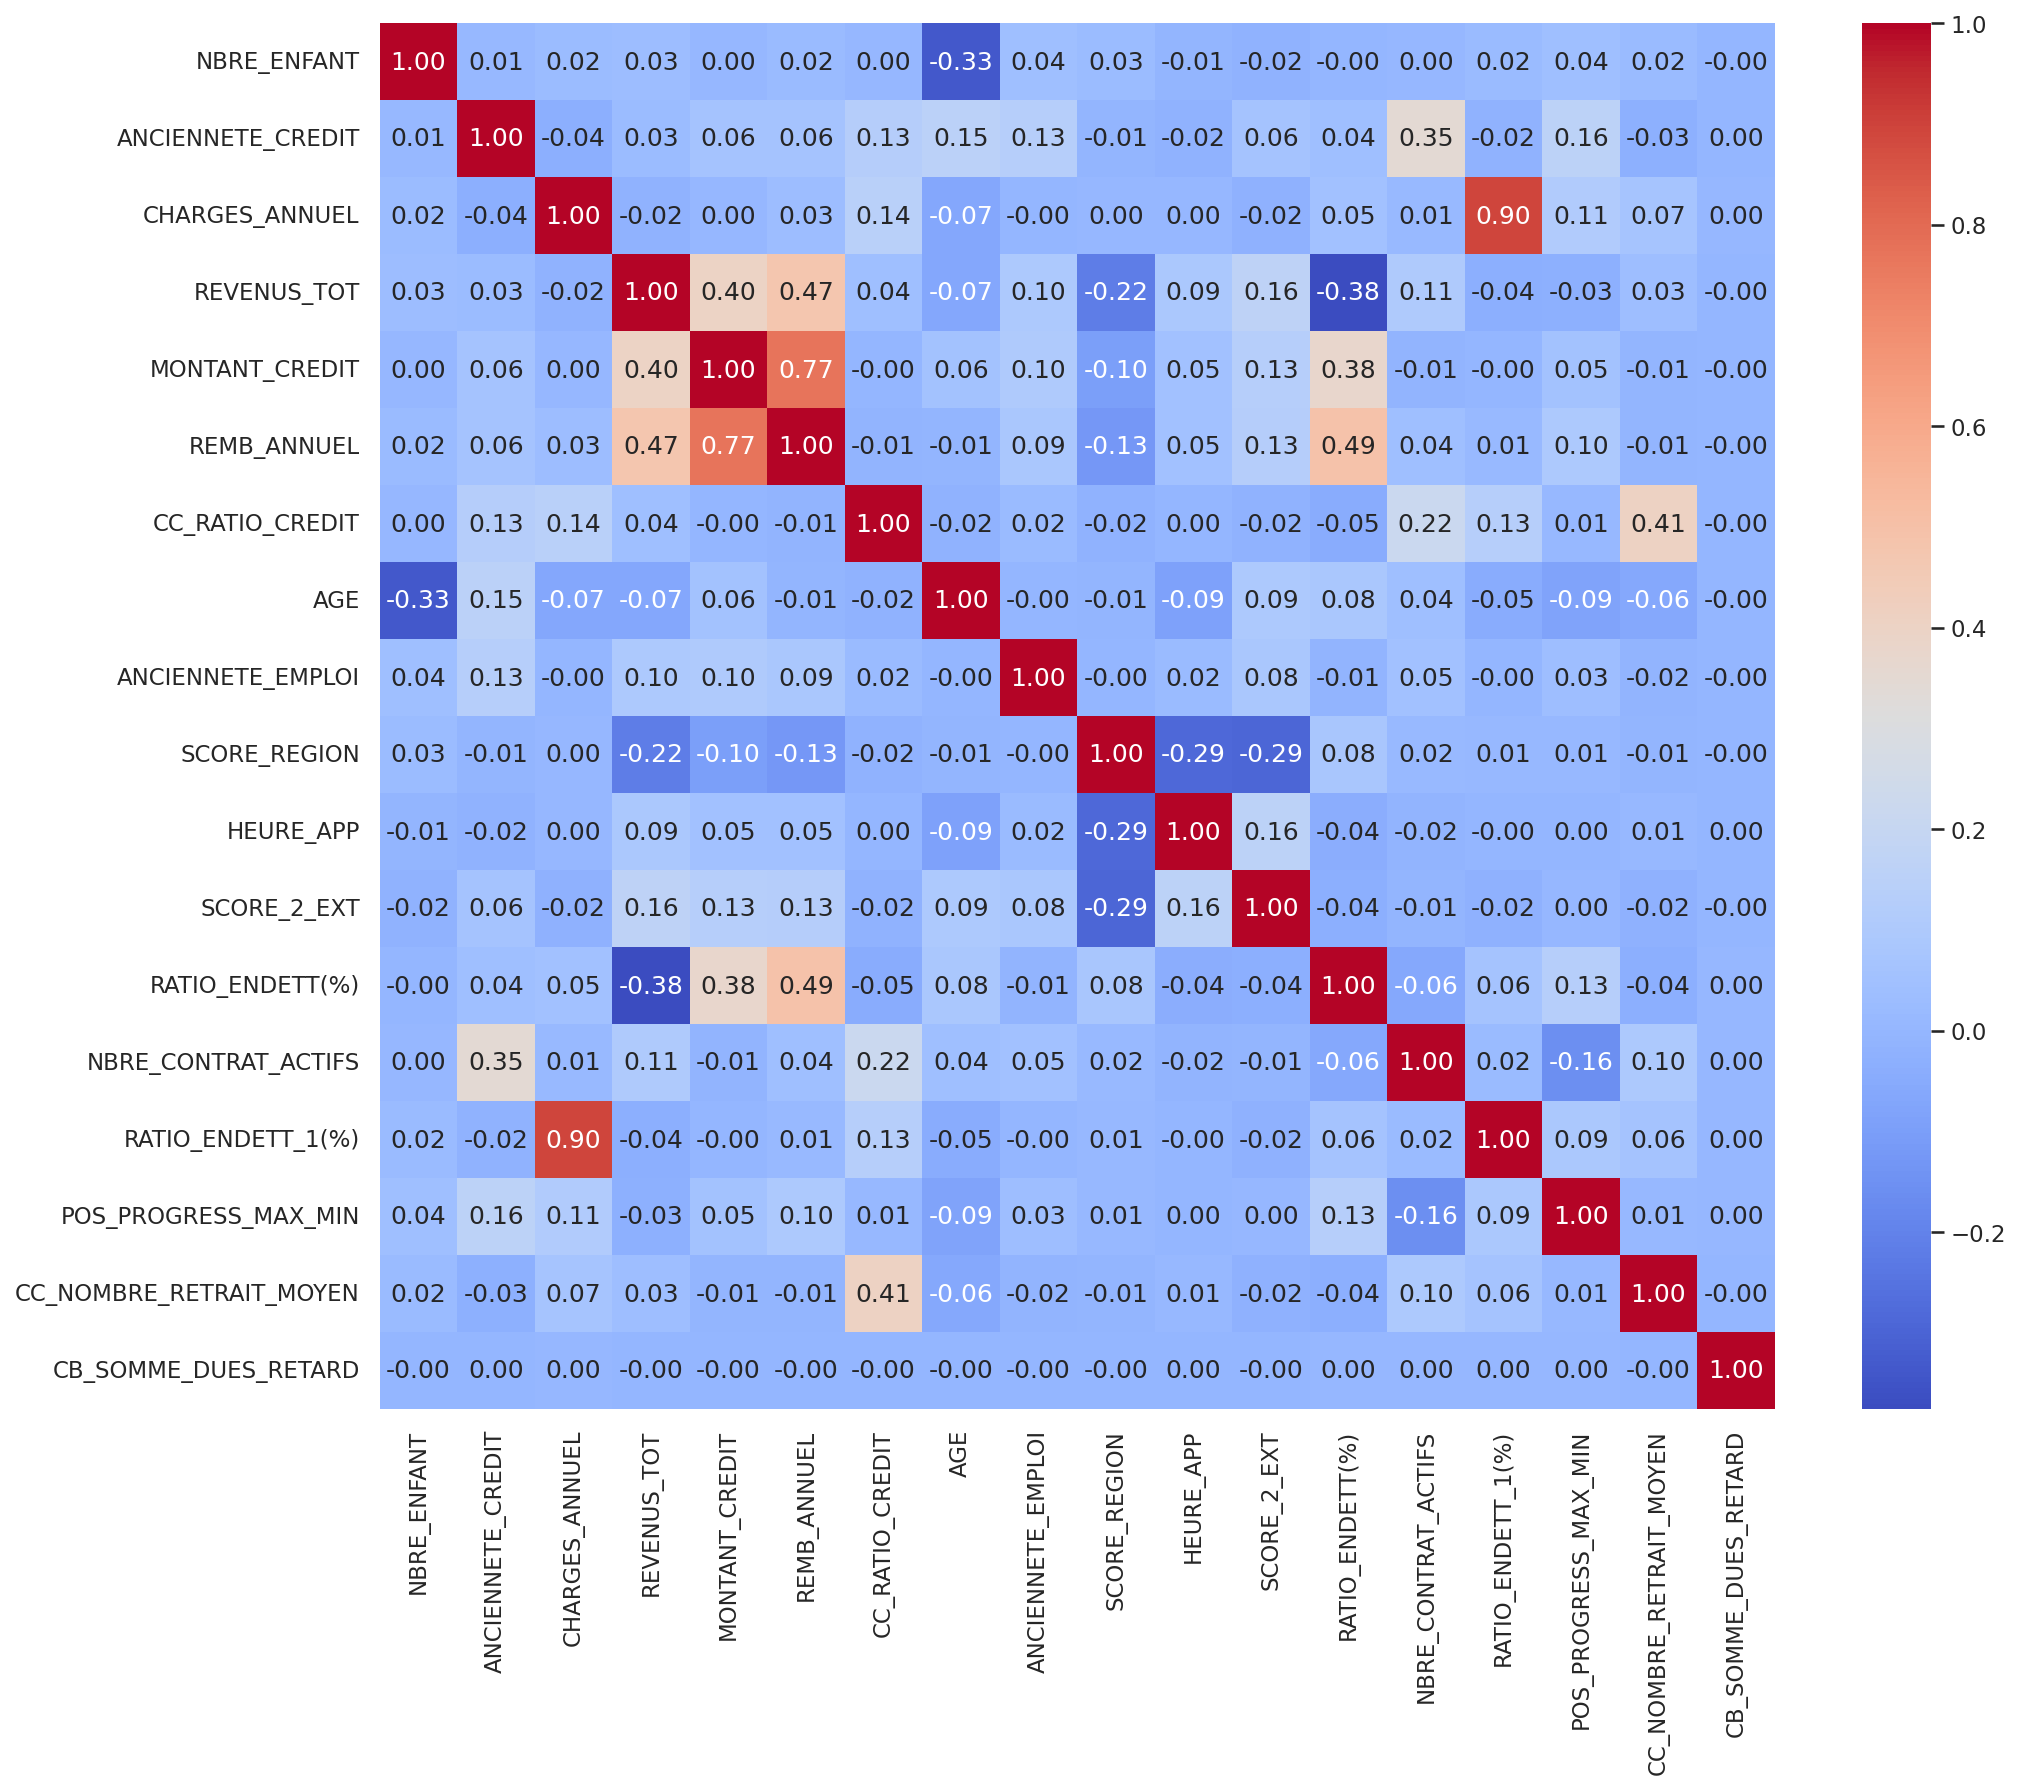

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(15,12), dpi = 150)
sns.heatmap(df[df_quant].corr(),annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('/content/P7_NB/P7_NB_correlation.png',bbox_inches = 'tight')

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT',
       'ANCIENNETE_CREDIT', 'CHARGES_ANNUEL', 'REVENUS_TOT', 'MONTANT_CREDIT',
       'REMB_ANNUEL', 'OCCUPATION', 'CC_RATIO_CREDIT', 'NIVEAU_ETUDE', 'AGE',
       'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP', 'SECTEUR_ACTIVITE',
       'SCORE_2_EXT', 'RATIO_ENDETT(%)', 'NBRE_CONTRAT_ACTIFS',
       'NBRE_J_RETARD', 'RATIO_ENDETT_1(%)', 'POS_PROGRESS_MAX_MIN',
       'CC_NOMBRE_RETRAIT_MOYEN', 'CB_SOMME_DUES_RETARD'],
      dtype='object')

In [ ]:
#Pour l'itération 1 je choisie les variables suivantes
df = df[['SK_ID_CURR', 'TARGET', 'GENRE', 'PROPRIETAIRE', 'NBRE_ENFANT',
       'ANCIENNETE_CREDIT', 'CHARGES_ANNUEL', 'REVENUS_TOT', 'MONTANT_CREDIT',
       'OCCUPATION', 'CC_RATIO_CREDIT', 'NIVEAU_ETUDE', 'AGE',
       'ANCIENNETE_EMPLOI', 'SCORE_REGION', 'HEURE_APP', 'SECTEUR_ACTIVITE',
       'SCORE_2_EXT', 'RATIO_ENDETT(%)', 'NBRE_CONTRAT_ACTIFS',
       'NBRE_J_RETARD', 'POS_PROGRESS_MAX_MIN',
       'CC_NOMBRE_RETRAIT_MOYEN', 'CB_SOMME_DUES_RETARD']]

#Je ôte le remboursement annul et je garde le ratio_endett de base, je ôte également le ratio endett 1



In [ ]:
df.to_csv('/content/P7_NB/df_it_1.csv', index = False)

In [ ]:
len(df)

307239

# Téléchargement dossier P7_NB

In [ ]:
import shutil
from google.colab import files

folder_name = 'P7_NB'

# Zip the 'graphs' folder
shutil.make_archive(folder_name, 'zip', folder_name)

# Download the zip file
files.download(folder_name+'.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>